In [287]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [288]:
# Loot at the adjusted close prices of stocks

tickers = ["TSM", "NVDA", "VOO", "TSLA"]
data = yf.download(tickers, start = "2015-01-01", end = "2025-03-31", auto_adjust=False)

adj_close = data["Adj Close"].dropna(how = "any")
adj_close

[*********************100%***********************]  4 of 4 completed


Ticker            NVDA        TSLA         TSM         VOO
Date                                                      
2015-01-02    0.483099   14.620667   16.790497  157.088226
2015-01-05    0.474939   14.006000   16.383537  154.328339
2015-01-06    0.460540   14.085333   16.097172  152.810806
2015-01-07    0.459340   14.063333   16.330786  154.720230
2015-01-08    0.476619   14.041333   16.436293  157.438385
...                ...         ...         ...         ...
2025-03-24  121.410004  278.390015  181.160004  527.560974
2025-03-25  120.690002  288.140015  180.899994  528.816650
2025-03-26  113.760002  272.059998  173.500000  522.648010
2025-03-27  111.430000  273.130005  168.240005  521.210022
2025-03-28  109.669998  263.549988  165.250000  510.799988

[2575 rows x 4 columns]

In [289]:
# Compute factors. Here I use volatiliy and momentum (20 days).

momentum_window = 20

daily_returns = adj_close.pct_change().dropna()
log_returns = np.log(1 + daily_returns).dropna()
momentum = (adj_close / adj_close.shift(momentum_window) -1).dropna()
volatility = (np.log(1 + daily_returns)).rolling(momentum_window).std().dropna()

factors_df = pd.DataFrame({
    'Momentum_TSM': momentum['TSM'], 
    'Momentum_NVDA': momentum['NVDA'], 
    'Momentum_VOO': momentum['VOO'], 
    'Momentum_TSLA': momentum['TSLA'],
    'Volatility_TSM': volatility['TSM'],
    'Volatility_NVDA': volatility['NVDA'],
    'Volatility_VOO': volatility['VOO'],
    'Volatility_TSLA': volatility['TSLA']
})

factors_df

Momentum_TSM  Momentum_NVDA  Momentum_VOO  Momentum_TSLA  \
Date                                                                   
2015-02-02      0.029623      -0.025335     -0.017569      -0.038165   
2015-02-03      0.064858       0.016169      0.014587       0.039364   
2015-02-04      0.103932       0.050547      0.021171       0.034409   
2015-02-05      0.091832       0.070533      0.018807       0.047594   
2015-02-06      0.059147       0.027190     -0.001589       0.032001   
...                  ...            ...           ...            ...   
2025-03-24     -0.051052      -0.067998     -0.035965      -0.157747   
2025-03-25     -0.041005      -0.046821     -0.028843      -0.048415   
2025-03-26     -0.105046      -0.133376     -0.040768      -0.064443   
2025-03-27     -0.067339      -0.072491     -0.027795      -0.031282   
2025-03-28     -0.081073      -0.121997     -0.061792      -0.100451   

            Volatility_TSM  Volatility_NVDA  Volatility_VOO  Volatility_TSLA  
Date                                                                          
2015-02-02        0.025428         0.020896        0.010971         0.024417  
2015-02-03        0.024721         0.021318        0.010731         0.023708  
2015-02-04        0.024439         0.019979        0.010489         0.023692  
2015-02-05        0.024338         0.020171        0.010369         0.023770  
2015-02-06        0.025139         0.018613        0.009637         0.024133  
...                    ...              ...             ...              ...  
2025-03-24        0.030335         0.043644        0.013334         0.063734  
2025-03-25        0.030255         0.043257        0.013344         0.061574  
2025-03-26        0.030660         0.044033        0.013527         0.062239  
2025-03-27        0.027135         0.039842        0.013117         0.061913  
2025-03-28        0.027325         0.038618        0.013128         0.061612  

[2555 rows x 8 columns]

In [290]:
combined_df = pd.concat([adj_close, daily_returns, log_returns, factors_df], axis = 1, keys = ["Price", "SimpleRet", "LogRet", "Factors"])
combined_df

Price                                     SimpleRet  \
                  NVDA        TSLA         TSM         VOO      NVDA   
Date                                                                   
2015-01-02    0.483099   14.620667   16.790497  157.088226       NaN   
2015-01-05    0.474939   14.006000   16.383537  154.328339 -0.016890   
2015-01-06    0.460540   14.085333   16.097172  152.810806 -0.030319   
2015-01-07    0.459340   14.063333   16.330786  154.720230 -0.002605   
2015-01-08    0.476619   14.041333   16.436293  157.438385  0.037618   
...                ...         ...         ...         ...       ...   
2025-03-24  121.410004  278.390015  181.160004  527.560974  0.031521   
2025-03-25  120.690002  288.140015  180.899994  528.816650 -0.005930   
2025-03-26  113.760002  272.059998  173.500000  522.648010 -0.057420   
2025-03-27  111.430000  273.130005  168.240005  521.210022 -0.020482   
2025-03-28  109.669998  263.549988  165.250000  510.799988 -0.015795   

                                            LogRet                      \
                TSLA       TSM       VOO      NVDA      TSLA       TSM   
Date                                                                     
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05 -0.042041 -0.024237 -0.017569 -0.017034 -0.042950 -0.024536   
2015-01-06  0.005664 -0.017479 -0.009833 -0.030788  0.005648 -0.017633   
2015-01-07 -0.001562  0.014513  0.012495 -0.002609 -0.001563  0.014408   
2015-01-08 -0.001564  0.006461  0.017568  0.036927 -0.001566  0.006440   
...              ...       ...       ...       ...       ...       ...   
2025-03-24  0.119336  0.025067  0.017549  0.031034  0.112735  0.024758   
2025-03-25  0.035023 -0.001435  0.002380 -0.005948  0.034423 -0.001436   
2025-03-26 -0.055806 -0.040907 -0.011665 -0.059134 -0.057424 -0.041767   
2025-03-27  0.003933 -0.030317 -0.002751 -0.020694  0.003925 -0.030786   
2025-03-28 -0.035075 -0.017772 -0.019973 -0.015921 -0.035705 -0.017932   

                          Factors                                           \
                 VOO Momentum_TSM Momentum_NVDA Momentum_VOO Momentum_TSLA   
Date                                                                         
2015-01-02       NaN          NaN           NaN          NaN           NaN   
2015-01-05 -0.017725          NaN           NaN          NaN           NaN   
2015-01-06 -0.009882          NaN           NaN          NaN           NaN   
2015-01-07  0.012418          NaN           NaN          NaN           NaN   
2015-01-08  0.017416          NaN           NaN          NaN           NaN   
...              ...          ...           ...          ...           ...   
2025-03-24  0.017397    -0.051052     -0.067998    -0.035965     -0.157747   
2025-03-25  0.002377    -0.041005     -0.046821    -0.028843     -0.048415   
2025-03-26 -0.011734    -0.105046     -0.133376    -0.040768     -0.064443   
2025-03-27 -0.002755    -0.067339     -0.072491    -0.027795     -0.031282   
2025-03-28 -0.020175    -0.081073     -0.121997    -0.061792     -0.100451   

                                                                          
           Volatility_TSM Volatility_NVDA Volatility_VOO Volatility_TSLA  
Date                                                                      
2015-01-02            NaN             NaN            NaN             NaN  
2015-01-05            NaN             NaN            NaN             NaN  
2015-01-06            NaN             NaN            NaN             NaN  
2015-01-07            NaN             NaN            NaN             NaN  
2015-01-08            NaN             NaN            NaN             NaN  
...                   ...             ...            ...             ...  
2025-03-24       0.030335        0.043644       0.013334        0.063734  
2025-03-25       0.030255        0.043257       0.013344        0.061574  
2025-03-26       0.030660        0.044033       0.013

In [291]:
print("\nMomentum & Volatility Descriptive Stats:")
print(factors_df.describe())

# Daily/Log returns summary stats
print("\nDaily Returns Descriptive Stats:")
print(daily_returns.describe())

print("\nLog Returns Descriptive Stats:")
print(log_returns.describe())


Momentum & Volatility Descriptive Stats:
       Momentum_TSM  Momentum_NVDA  Momentum_VOO  Momentum_TSLA  \
count   2555.000000    2555.000000   2555.000000    2555.000000   
mean       0.022058       0.052774      0.010525       0.039335   
std        0.086761       0.135923      0.043818       0.187942   
min       -0.230222      -0.374189     -0.309180      -0.606265   
25%       -0.034090      -0.031520     -0.008513      -0.083103   
50%        0.020587       0.050990      0.016602       0.016263   
75%        0.076027       0.129924      0.034901       0.122701   
max        0.477898       0.488476      0.228521       1.063036   

       Volatility_TSM  Volatility_NVDA  Volatility_VOO  Volatility_TSLA  
count     2555.000000      2555.000000     2555.000000      2555.000000  
mean         0.018965         0.028335        0.009335         0.033178  
std          0.007713         0.012188        0.006338         0.013814  
min          0.006189         0.009001        0.001928    

Factor Correlation Matrix:
                  Momentum_TSM  Momentum_NVDA  Momentum_VOO  Momentum_TSLA  \
Momentum_TSM         1.000000       0.577948      0.590654       0.374226   
Momentum_NVDA        0.577948       1.000000      0.614051       0.339254   
Momentum_VOO         0.590654       0.614051      1.000000       0.503109   
Momentum_TSLA        0.374226       0.339254      0.503109       1.000000   
Volatility_TSM       0.015798      -0.073491     -0.144572      -0.073939   
Volatility_NVDA     -0.217026      -0.090026     -0.269484      -0.141465   
Volatility_VOO      -0.230236      -0.216777     -0.413771      -0.168816   
Volatility_TSLA     -0.107489      -0.130236     -0.209587       0.045194   

                 Volatility_TSM  Volatility_NVDA  Volatility_VOO  \
Momentum_TSM           0.015798        -0.217026       -0.230236   
Momentum_NVDA         -0.073491        -0.090026       -0.216777   
Momentum_VOO          -0.144572        -0.269484       -0.413771   
Moment

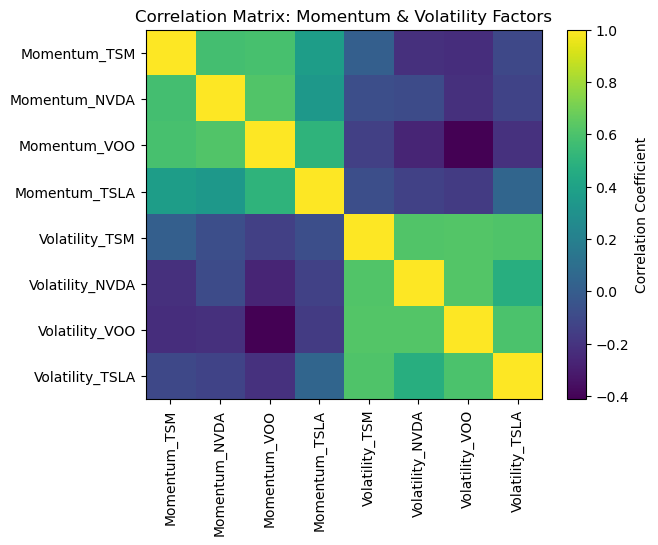

In [292]:
# EDA begins.
# Display correlation matrix of factors

factor_corr = factors_df.corr()

print("Factor Correlation Matrix:\n", factor_corr)

plt.figure()
plt.imshow(factor_corr, aspect = "auto")
plt.colorbar(label = "Correlation Coefficient")
plt.xticks(range(len(factor_corr.columns)), factor_corr.columns, rotation=90)
plt.yticks(range(len(factor_corr.columns)), factor_corr.columns)
plt.title("Correlation Matrix: Momentum & Volatility Factors")
plt.show()

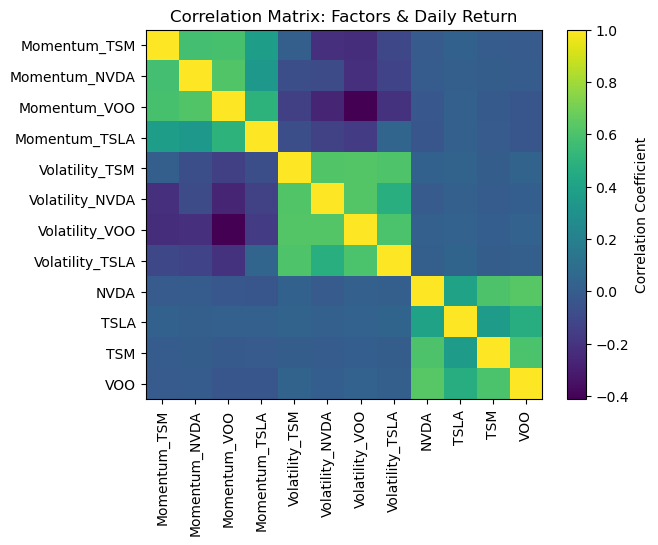

In [293]:
# EDA
# Display correlation matrix of factors and return rates

shifted_factors = factors_df.shift(1)
factors_return_corr = pd.concat([shifted_factors, daily_returns], axis = 1).corr()

plt.figure()
plt.imshow(factors_return_corr, aspect = "auto")
plt.colorbar(label = "Correlation Coefficient")
plt.xticks(range(len(factors_return_corr.columns)), factors_return_corr.columns, rotation = 90)
plt.yticks(range(len(factors_return_corr.columns)), factors_return_corr.columns)
plt.title("Correlation Matrix: Factors & Daily Return")
plt.show()


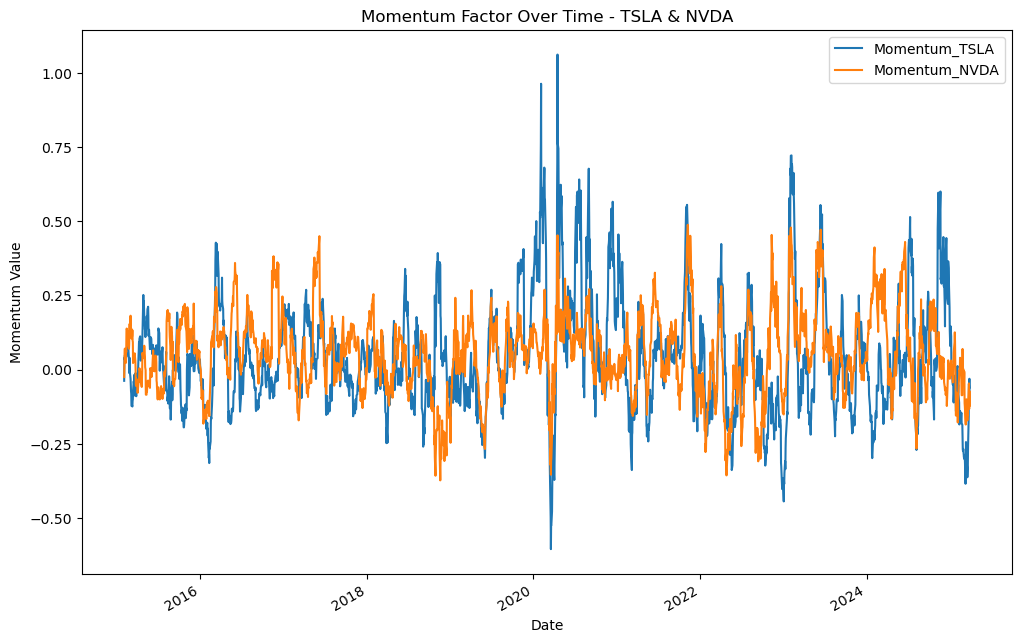

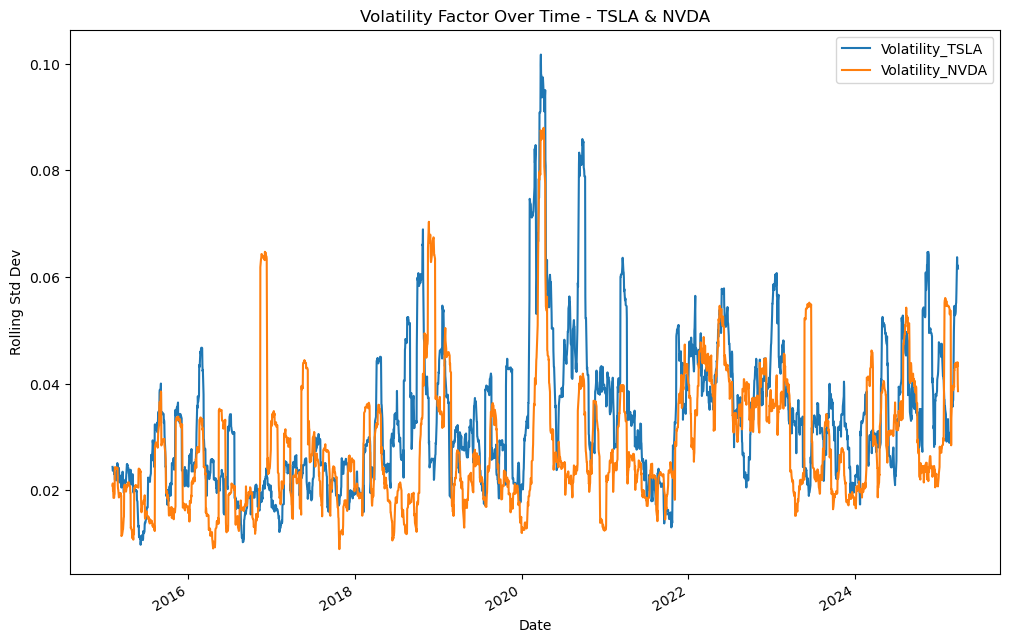

In [294]:
# EDA
# Visualize factors as functions of time

factors_df[['Momentum_TSLA', 'Momentum_NVDA']].plot(figsize=(12,8))
plt.title("Momentum Factor Over Time - TSLA & NVDA")
plt.ylabel("Momentum Value")
plt.show()

factors_df[['Volatility_TSLA', 'Volatility_NVDA']].plot(figsize=(12, 8))
plt.title("Volatility Factor Over Time - TSLA & NVDA")
plt.ylabel("Rolling Std Dev")
plt.show()

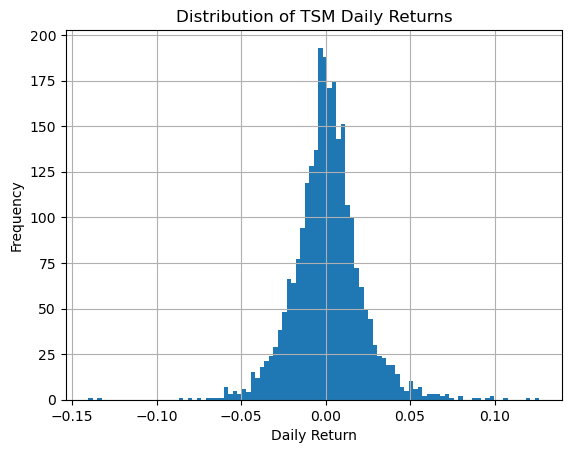

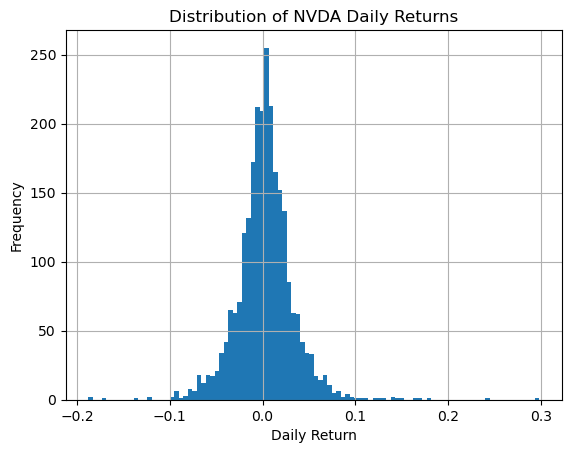

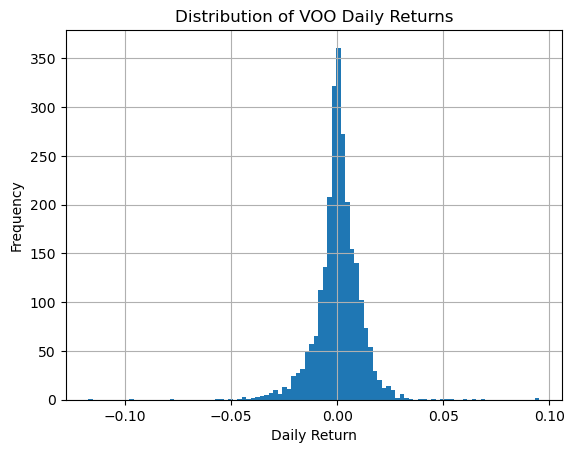

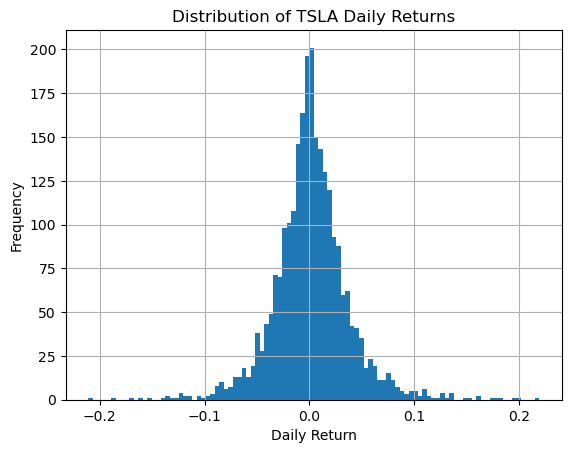

In [295]:
# EDA
tickers = ["TSM", "NVDA", "VOO", "TSLA"]

for ticker in tickers :
    daily_returns[f"{ticker}"].hist(bins=100)
    plt.title(f"Distribution of {ticker} Daily Returns")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.show()

#Non-normal distributions.

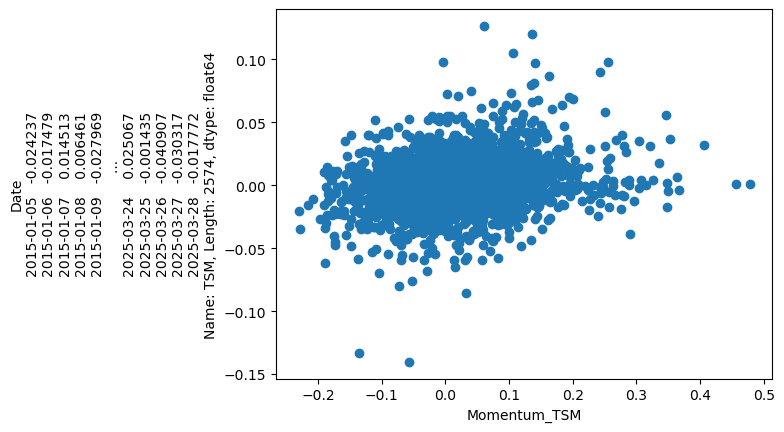

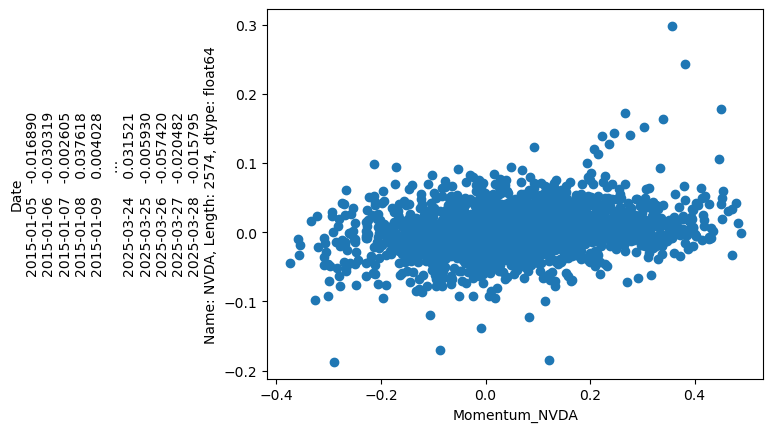

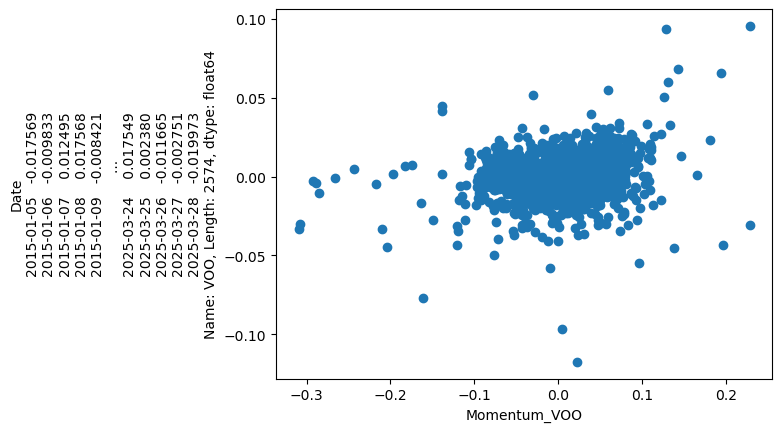

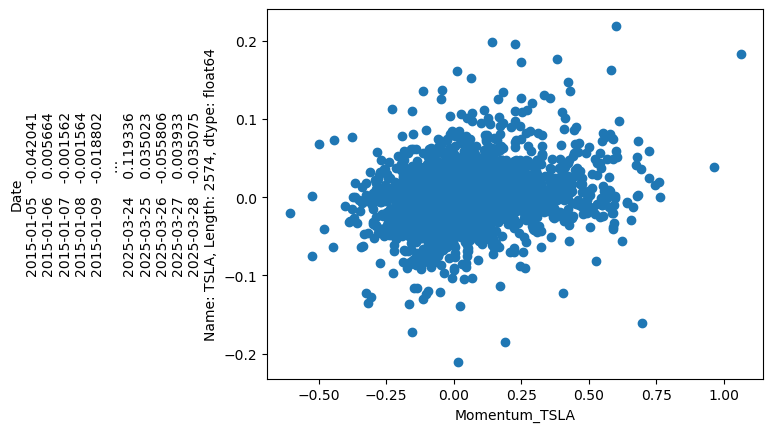

In [296]:
# EDA
tickers = ["TSM", "NVDA", "VOO", "TSLA"]

for ticker in tickers :
    plt.figure()
    plt.scatter(factors_df[f"Momentum_{ticker}"], daily_returns[f"{ticker}"].shift(19).dropna())
    plt.xlabel(f"Momentum_{ticker}")
    plt.ylabel(daily_returns[f"{ticker}"])

#Can see outliers and high-leverage points. But we are going to keep them for the moment.

In [297]:
# Use CAMP to build a portfolio
# Use historical mean and risk 

import cvxpy as cp

# I use len(train) : len(test) = 4 : 1
# Long enough training period to include all market conditions (bull, bear, high volatility etc)

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

daily_returns_train = daily_returns.loc[train_start : train_end].dropna()
daily_returns_test = daily_returns.loc[test_start : test_end].dropna()
mu_train = daily_returns_train.mean()
Sigma_train = daily_returns_train.cov()

n = len(tickers)
w = cp.Variable(n)
lambda_param = 1.0

objective = cp.Maximize(mu_train.values @ w - lambda_param * (w @ Sigma_train.values @ w))

constraints = [cp.sum(w) == 1, w >= 0]

problem = cp.Problem(objective, constraints)

solution = problem.solve()
print("Optimization status:", problem.status)
print("Optimal value:", problem.value)
print("Optimal weights:")
for i, ticker in enumerate(tickers):
    print(f"  {ticker}: {w.value[i]:.4f}")
    

Optimization status: optimal
Optimal value: 0.0012736378948963584
Optimal weights:
  TSM: 0.8199
  NVDA: 0.1801
  VOO: 0.0000
  TSLA: 0.0000


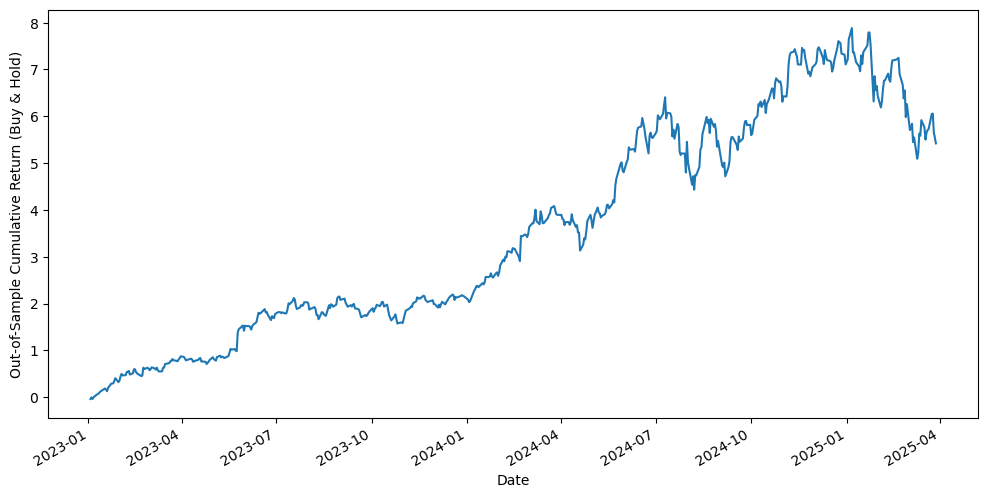

In [298]:
# Graph of cumulative returns on test data

portfolio_returns_test = (daily_returns_test * w.value).sum(axis = 1)
cumulative_returns_test = (1 + portfolio_returns_test).cumprod() - 1

plt.figure(figsize = (12, 6))
cumulative_returns_test.plot()
plt.xlabel("Date")
plt.ylabel("Out-of-Sample Cumulative Return (Buy & Hold)")
plt.show()

In [299]:
# Model metrics : Return, Volatility, Sharpe Ratio, Max Drawdown
# VaR and CVaR


# Return, Volatility, Sharpe Ratio, Max Drawdown
num_days_test = portfolio_returns_test.shape[0]
ann_return = ((1 + portfolio_returns_test).prod()) ** (252 / num_days_test) - 1
ann_std_dev = portfolio_returns_test.std() * np.sqrt(252) 
risk_free_rate = 0.045

if ann_std_dev != 0:
    Sharpe_ratio = ann_return / ann_std_dev
else:
    Sharpe_ratio = np.nan

peak = (1 + cumulative_returns_test).cummax()
drawdown = (1 + cumulative_returns_test - peak) / peak 
max_drawdown = drawdown.min()


print("Out-of-Sample Performance Metrics:")
print(f"Annualized Return: {ann_return:.2%}")
print(f"Annualized Volatility: {ann_std_dev:.2%}")
print(f"Sharpe Ratio: {Sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")





# VaR and CVaR

confidence = 0.95

def compute_VaR(returns):
    VaR = -np.percentile(returns, (1 - confidence) * 100)
    return VaR

def compute_CVaR(returns):
    threshold = np.percentile(returns, (1 - confidence) * 100)
    CVaR = -returns[returns <= threshold].mean()
    return CVaR

VaR = compute_VaR(portfolio_returns_test)
CVaR = compute_CVaR(portfolio_returns_test)

print(f"{confidence * 100}% VaR: {VaR:.4f}%")
print(f"{confidence * 100}% CVaR: {CVaR:.4f}%")



#Very high volatility 

Out-of-Sample Performance Metrics:
Annualized Return: 130.54%
Annualized Volatility: 47.78%
Sharpe Ratio: 2.73
Max Drawdown: -31.42%
95.0% VaR: 0.0417%
95.0% CVaR: 0.0607%


[*********************100%***********************]  1 of 1 completed


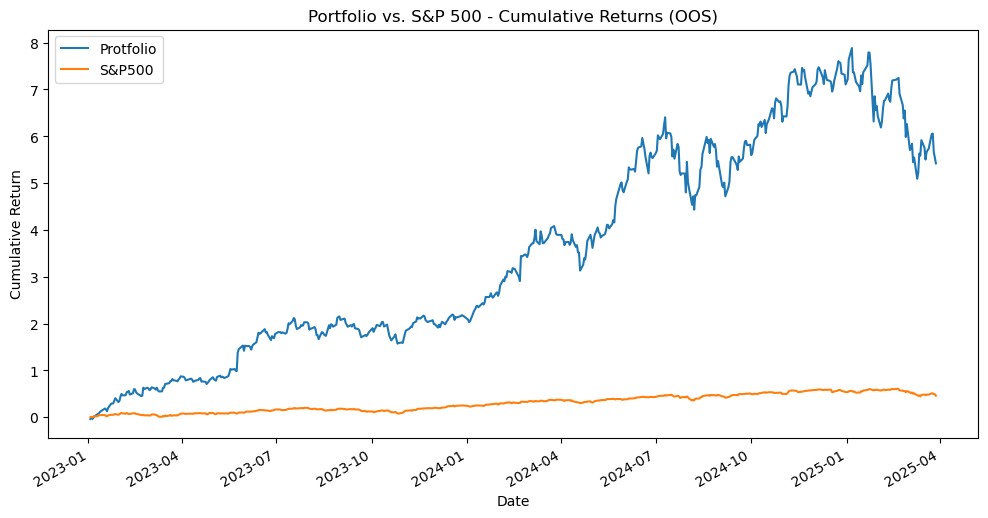

Out-of-Sample Performance Metrics:
Benchmark Annualized Return: 18.51%
Benchmark Annualized Volatility: 13.29%
Benchmark Sharpe Ratio: 1.39
Benchmark Max Drawdown: -10.28%
95.0% Benchmark VaR: 0.0143%
95.0% Benchmark CVaR: 0.0181%


In [300]:
# Comparison with benchmark S&P500

benchmark_data_test = yf.download("^GSPC", start = test_start, end = test_end, auto_adjust=False)
benchmark_test = benchmark_data_test["Adj Close"].dropna(how = "any")
benchmark_returns_test = benchmark_test.pct_change().sum(axis = 1)
benchmark_culmulative_returns_test = (1 + benchmark_returns_test).cumprod() - 1

compare_against_benchmark = pd.concat([cumulative_returns_test, benchmark_culmulative_returns_test], axis = 1)
compare_against_benchmark.columns = ["Protfolio", "S&P500"]

compare_against_benchmark.plot(figsize = (12, 6))
plt.title("Portfolio vs. S&P 500 - Cumulative Returns (OOS)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()





benchmark_ann_return = ((1 + benchmark_returns_test).prod()) ** (252 / num_days_test) - 1
benchmark_ann_std_dev = benchmark_returns_test.std() * np.sqrt(252) 
risk_free_rate = 0.045

if benchmark_ann_std_dev != 0:
    benchmark_Sharpe_ratio = benchmark_ann_return / benchmark_ann_std_dev
else:
    benchmark_Sharpe_ratio = np.nan

benchmark_peak = (1 + benchmark_culmulative_returns_test).cummax()
benchmark_drawdown = (1 + benchmark_culmulative_returns_test - benchmark_peak) / benchmark_peak 
benchmark_max_drawdown = benchmark_drawdown.min()


print("Out-of-Sample Performance Metrics:")
print(f"Benchmark Annualized Return: {benchmark_ann_return:.2%}")
print(f"Benchmark Annualized Volatility: {benchmark_ann_std_dev:.2%}")
print(f"Benchmark Sharpe Ratio: {benchmark_Sharpe_ratio:.2f}")
print(f"Benchmark Max Drawdown: {benchmark_max_drawdown:.2%}")



benchmark_VaR = compute_VaR(benchmark_returns_test)
benchmark_CVaR = compute_CVaR(benchmark_returns_test)

print(f"{confidence * 100}% Benchmark VaR: {benchmark_VaR:.4f}%")
print(f"{confidence * 100}% Benchmark CVaR: {benchmark_CVaR:.4f}%")



In [301]:
# Compute alpha and beta

from sklearn.linear_model import LinearRegression 

CAPM_data = pd.concat([portfolio_returns_test - risk_free_rate, benchmark_returns_test - risk_free_rate], axis = 1).dropna()
y = CAPM_data[0].values
X = CAPM_data[1].values.reshape(-1, 1)

CAPM_model = LinearRegression()
CAPM_model.fit(X,y)

alpha = CAPM_model.intercept_
beta = CAPM_model.coef_[0]
print(f"alpha = {alpha}")
print(f"beta = {beta}")

r_squared = CAPM_model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

alpha = 0.06694913787850651
beta = 2.442514895737323
R-squared: 0.4617


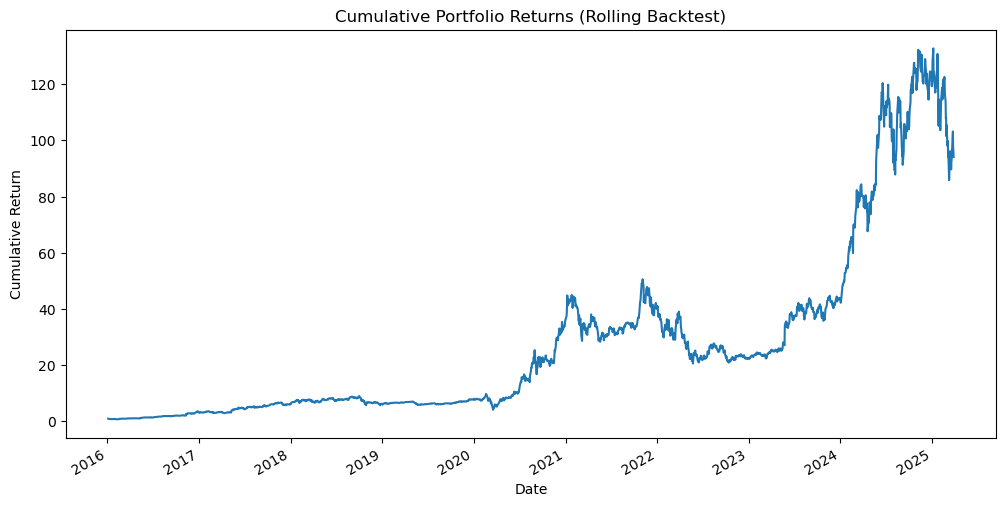

Final Cumulative Portfolio Return: 94.12428547854861


In [472]:
# Rolling / Rebalancing Backtest
# I am going to rebalance portfolio weights according to a fixed rebalance_frequency, base on the historical mu and Sigma obtained 
# by a rolling window (window_length) 

Hold the portfolio for a fixed period
import matplotlib.pyplot as plt
import cvxpy as cp

tickers = ["TSM", "NVDA", "VOO", "TSLA"]
n = len(tickers)

rebalance_frequency = 21
window_length = 252
transaction_cost_rate = 0.004 

dates = daily_returns.index   # dataframe daily_returns gives historical daily returns
w_prev = np.array([1/n] * n)

# Initialize overall cumulative return
cumulative_return = 1.0
# Store cumulative returns, index = dates
cumulative_returns = pd.Series(index = dates, dtype = float)

for t in range(window_length, len(dates), rebalance_frequency):
    train_window = daily_returns.iloc[t - window_length : t]
    test_window = daily_returns.iloc[t : t + rebalance_frequency]

    mu_train = train_window.mean()
    Sigma_train = train_window.cov()
    
    w = cp.Variable(n)
    lambda_param = 1.0
    objective = cp.Maximize(mu_train.values @ w - lambda_param * (w @ Sigma_train.values @ w))
    constraints = [cp.sum(w) == 1, w >= 0]
    problem = cp.Problem(objective, constraints)
    solution = problem.solve()
    w_new = w.value
    
    # Turnover and corresponding transaction cost penalty
    # Penalty factor: reduce the return on the rebalancing day by transaction_cost_rate * turnover.
    turnover = np.sum(np.abs(w_prev - w_new))
    penalty_factor = 1 - transaction_cost_rate * turnover
    
    portfolio_returns_window = test_window @ w_new 
    portfolio_returns_total = pd.concat([portfolio_returns_total , portfolio_returns_window] , axis = 0)

    first_day = test_window.index[0]
    # Adjust the first day's return:
    adjusted_return_first = (1 + portfolio_returns_window.iloc[0]) * penalty_factor - 1
    cumulative_return *= (1 + adjusted_return_first)
    cumulative_returns.loc[first_day] = cumulative_return
    
    # For the subsequent days in the test window, update cumulatively without further transaction penalties.
    for date in test_window.index[1:]:
        daily_ret = portfolio_returns_window.loc[date]
        cumulative_return *= (1 + daily_ret)
        cumulative_returns.loc[date] = cumulative_return
        
    w_prev = w_new


# Plot the cumulative returns over time:
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title="Cumulative Portfolio Returns (Rolling Backtest)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

print("Final Cumulative Portfolio Return:", cumulative_return)

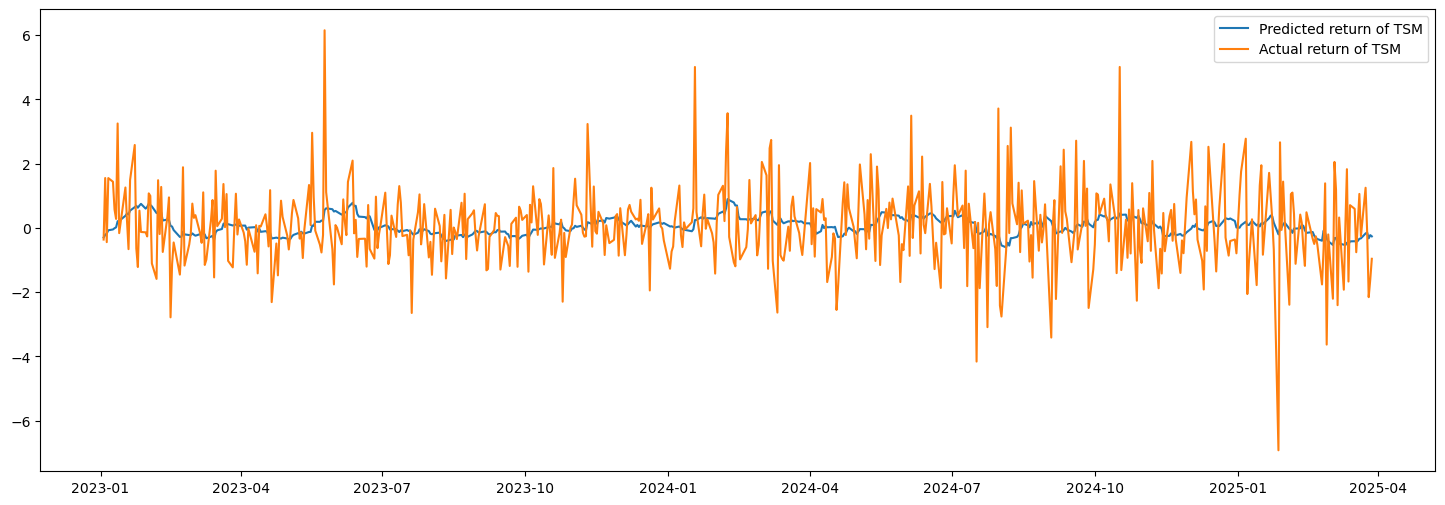

R-squared = -18.5736
Directional Accuracy: 0.5347593582887701


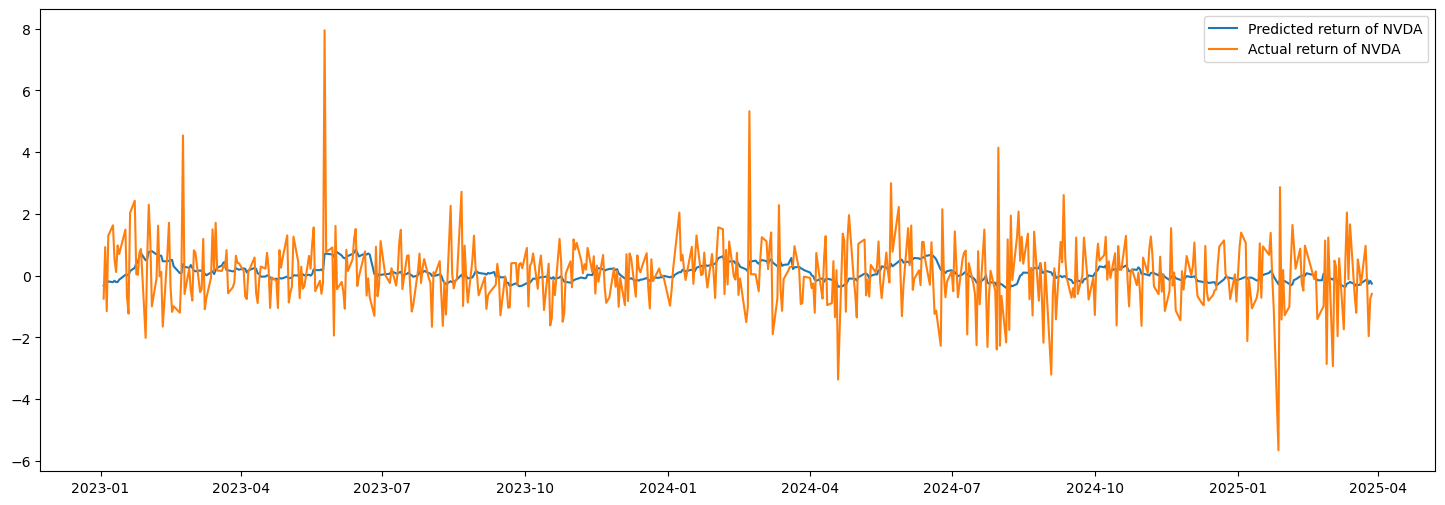

R-squared = -15.3364
Directional Accuracy: 0.5454545454545454


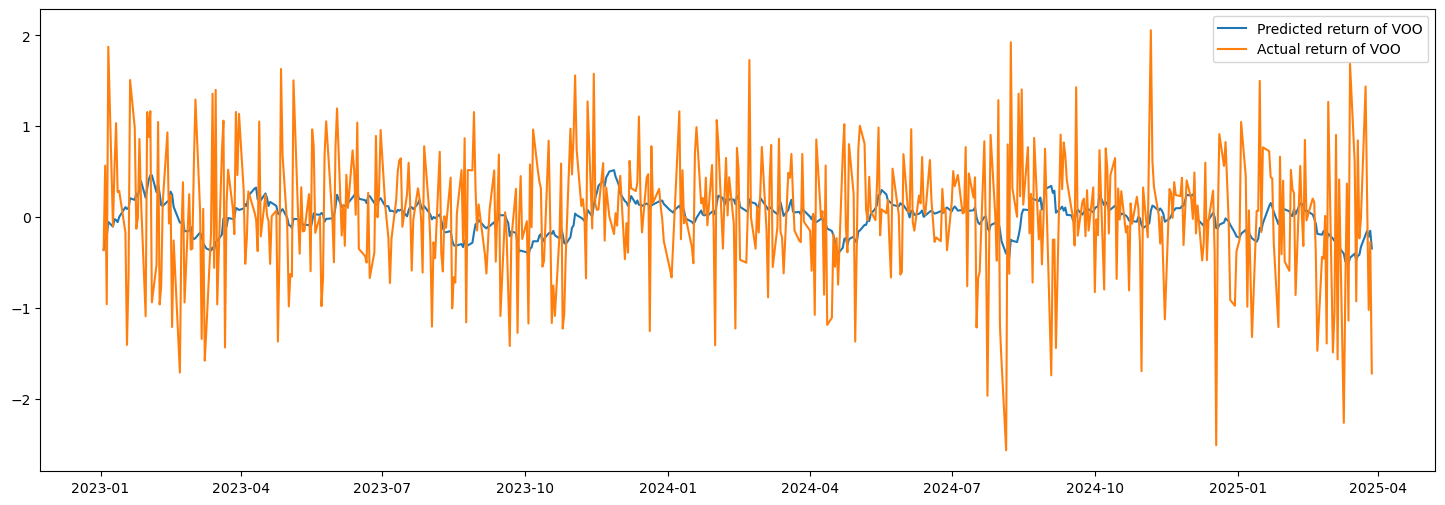

R-squared = -13.1677
Directional Accuracy: 0.5882352941176471


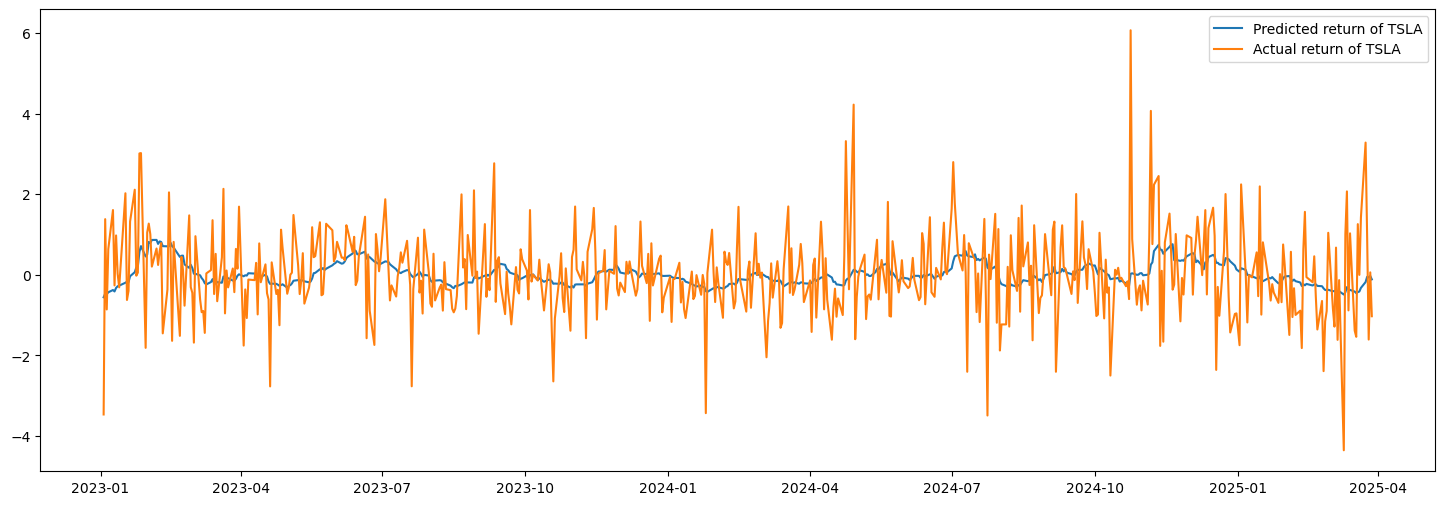

R-squared = -13.9718
Directional Accuracy: 0.5882352941176471


In [302]:
# I want to predict expected returns (mu) used in CAPM 

#Building Factor-Based Expected Returns
#Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

models = {}
predictions = {}

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][[f"{ticker}"]]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][[f"{ticker}"]]

    scalar_X = StandardScaler().fit(X_train)
    X_scaled_train = scalar_X.transform(X_train)
    X_scaled_test = scalar_X.transform(X_test)
    scalar_y = StandardScaler().fit(y_train)
    y_scaled_train = scalar_y.transform(y_train)
    y_scaled_test = scalar_y.transform(y_test)
    
    model = LinearRegression().fit(X_scaled_train,y_scaled_train)
    models[ticker] = model
    predictions[ticker] = model.predict(X_scaled_test)
    

    plt.figure(figsize = (18, 6))
    plt.plot(y_test.index,predictions[ticker], label = f"Predicted return of {ticker}")
    plt.plot(y_test.index, y_scaled_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions[ticker], y_scaled_test):.4f}")

    directional_accuracy = np.mean(np.sign(predictions[ticker]) == np.sign(y_test))
    print("Directional Accuracy:", directional_accuracy)

#As we can see R2 < 0: worse than simply predicting the average

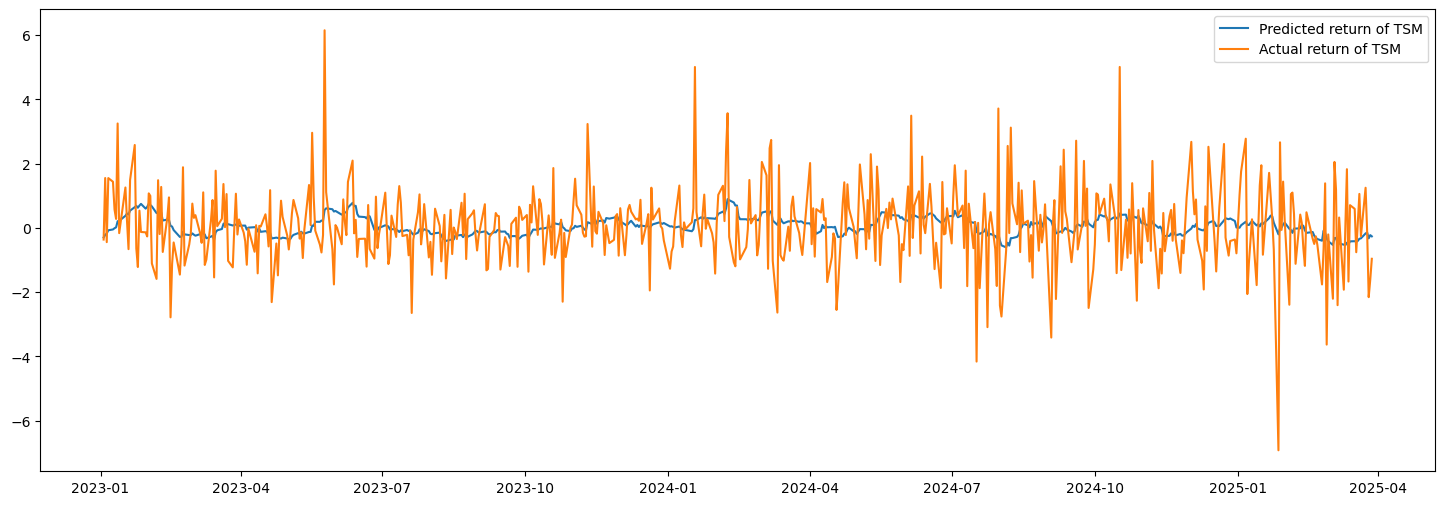

R-squared = -18.6132
Directional Accuracy: 0.5347593582887701


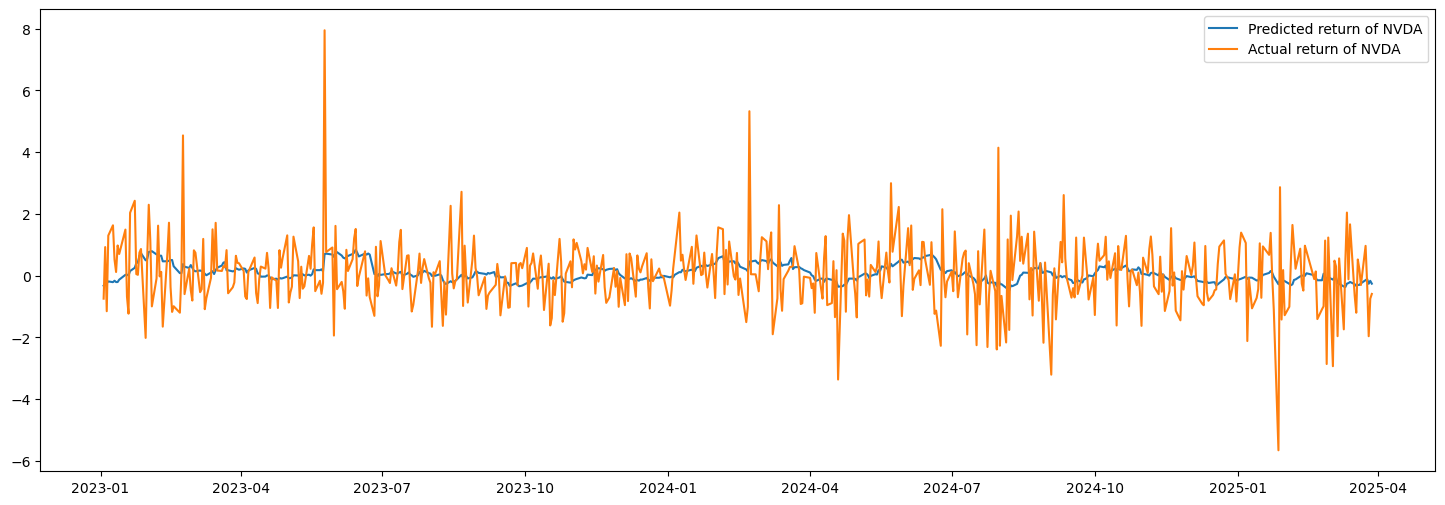

R-squared = -15.3712
Directional Accuracy: 0.5454545454545454


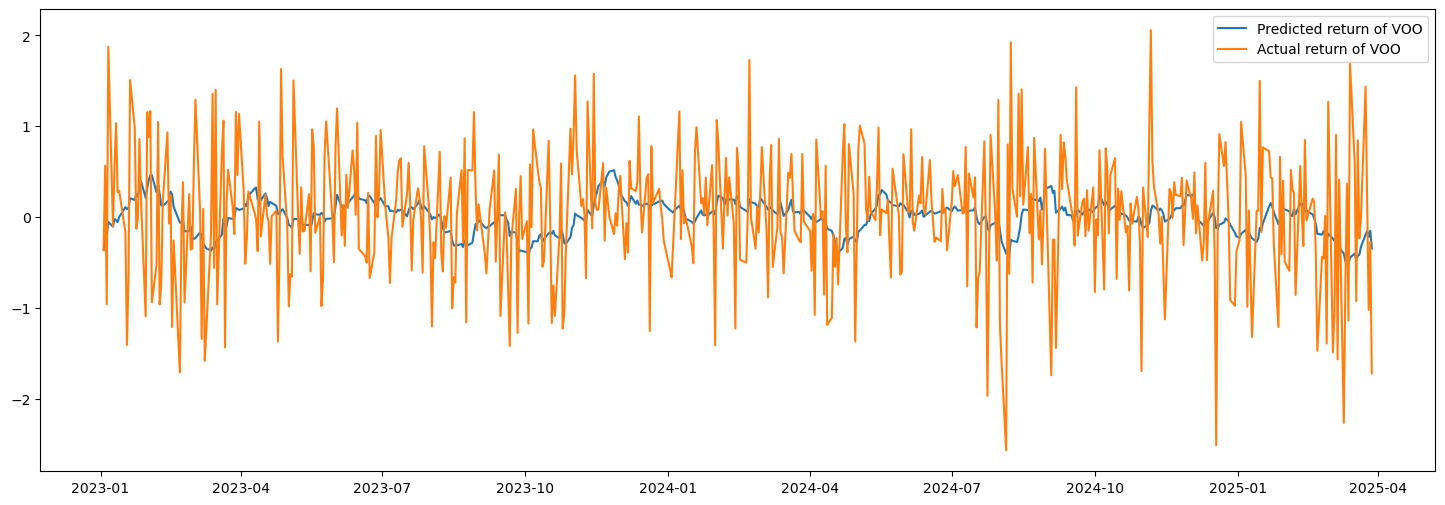

R-squared = -13.2078
Directional Accuracy: 0.5882352941176471


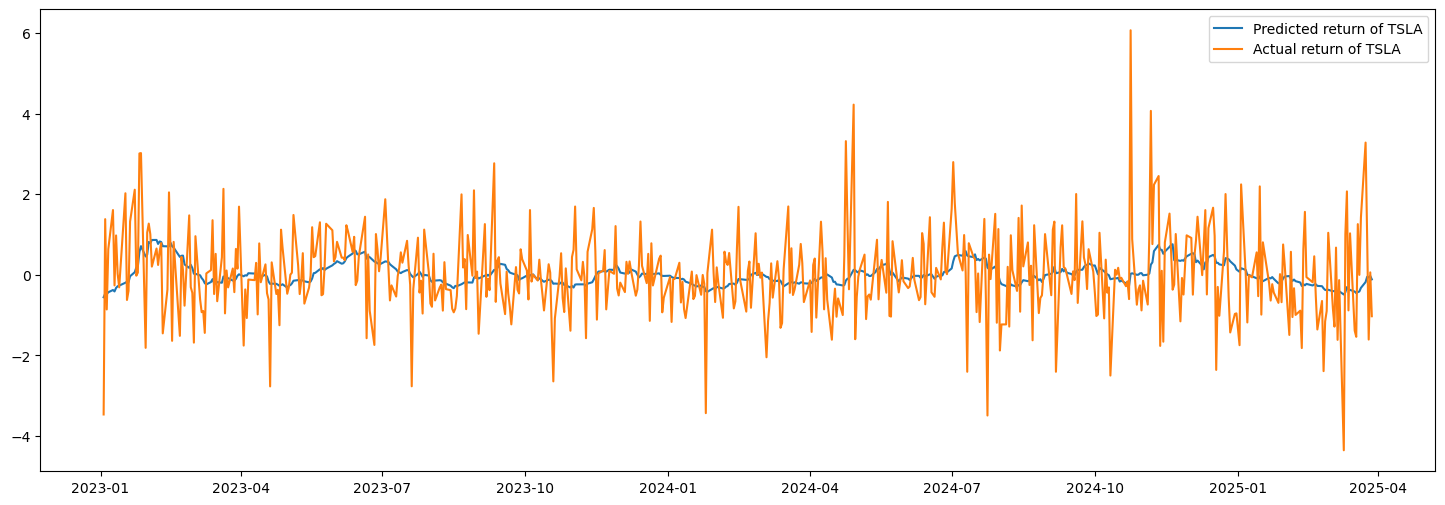

R-squared = -14.0014
Directional Accuracy: 0.5882352941176471


In [303]:
#Building Factor-Based Expected Returns
#Lasso, Ridge
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

models = {}
predictions = {}

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][[f"{ticker}"]]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][[f"{ticker}"]]

    scalar_X = StandardScaler().fit(X_train)
    X_scaled_train = scalar_X.transform(X_train)
    X_scaled_test = scalar_X.transform(X_test)
    scalar_y = StandardScaler().fit(y_train)
    y_scaled_train = scalar_y.transform(y_train)
    y_scaled_test = scalar_y.transform(y_test)
    
    model = Ridge(alpha = 2).fit(X_scaled_train,y_scaled_train)           #Change Ridge <-> Lasso here
    models[ticker] = model
    predictions[ticker] = model.predict(X_scaled_test) 
    

    plt.figure(figsize = (18, 6))
    plt.plot(y_test.index, predictions[ticker], label = f"Predicted return of {ticker}")
    plt.plot(y_test.index, y_scaled_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions[ticker], y_scaled_test):.4f}")

    directional_accuracy = np.mean(np.sign(predictions[ticker]) == np.sign(y_test))
    print("Directional Accuracy:", directional_accuracy)

#With Lasso almost all coeff = 0    
#As we can see R2 < 0: worse than simply predicting the average

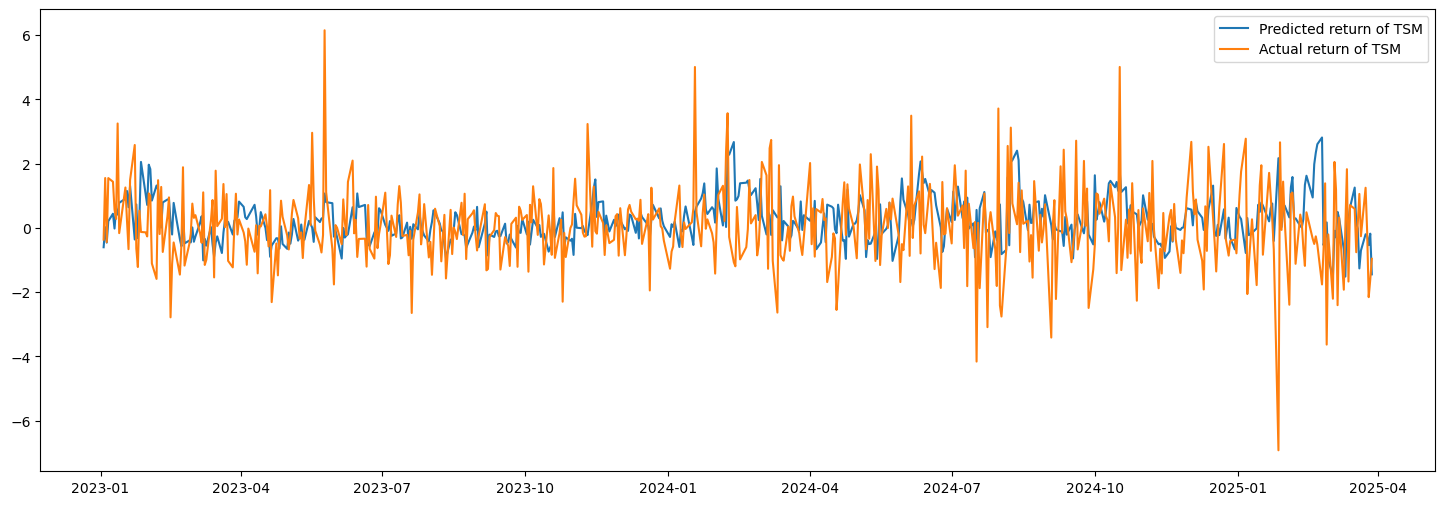

R-squared = -3.0182
Directional Accuracy: 0.5001763466689544


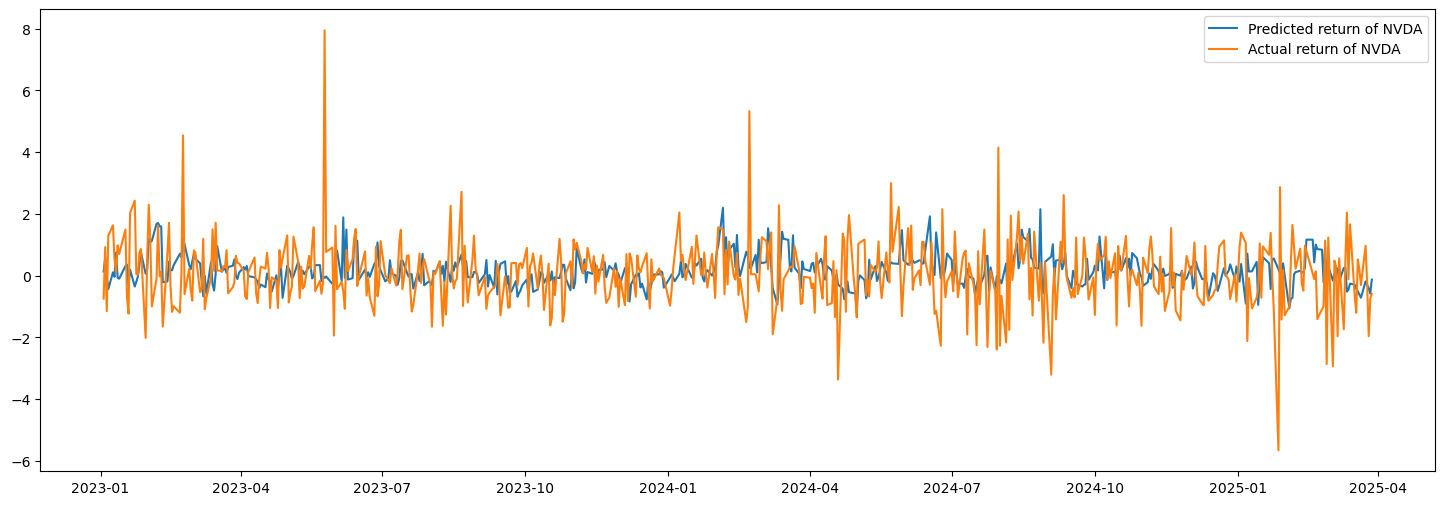

R-squared = -4.5563
Directional Accuracy: 0.5059592464436755


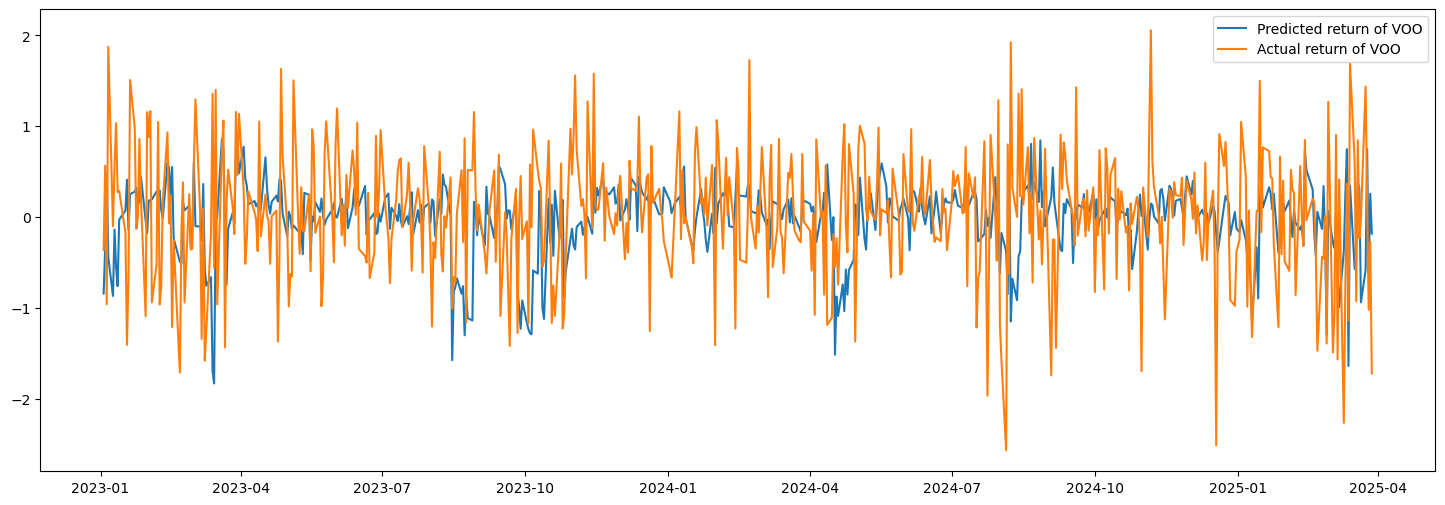

R-squared = -2.6401
Directional Accuracy: 0.5059370045214651


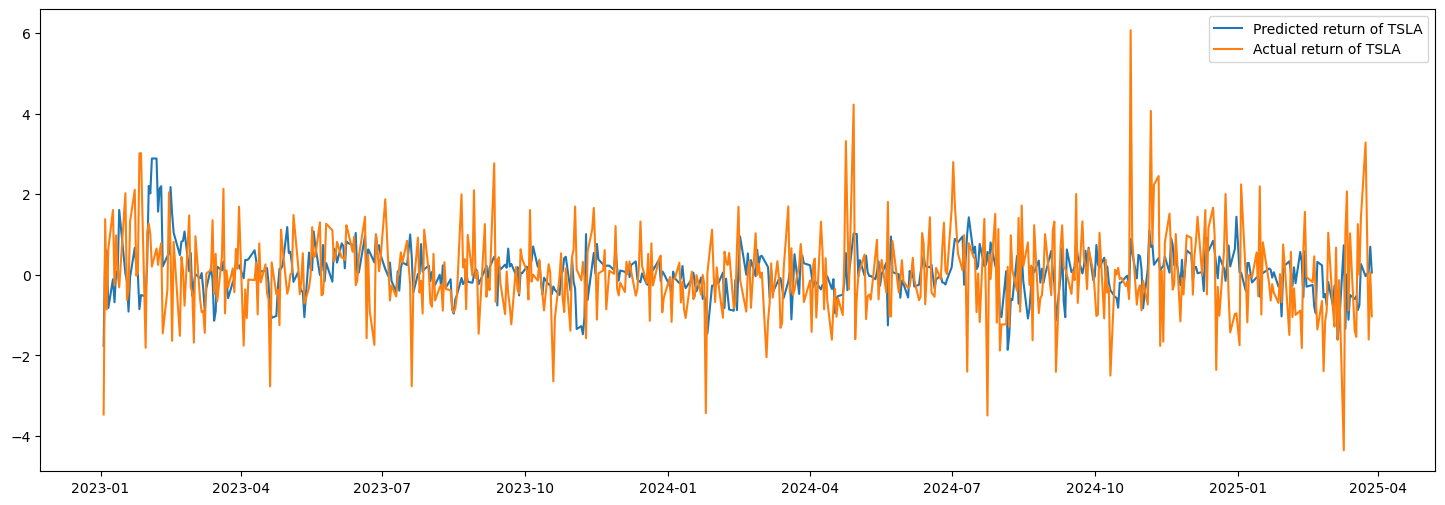

R-squared = -2.7842
Directional Accuracy: 0.49861623469676314


In [304]:
#Building Factor-Based Expected Returns
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

models = {}
predictions = {}

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][[f"{ticker}"]]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][[f"{ticker}"]]

    scalar_X = StandardScaler().fit(X_train)
    X_scaled_train = scalar_X.transform(X_train)
    X_scaled_test = scalar_X.transform(X_test)
    scalar_y = StandardScaler().fit(y_train)
    y_scaled_train = scalar_y.transform(y_train)
    y_scaled_test = scalar_y.transform(y_test)
    
    model = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(X_scaled_train, y_scaled_train.ravel())
    models[ticker] = model
    predictions[ticker] = model.predict(X_scaled_test)
    

    plt.figure(figsize = (18, 6))
    plt.plot(y_test.index, predictions[ticker], label = f"Predicted return of {ticker}")
    plt.plot(y_test.index, y_scaled_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions[ticker], y_scaled_test):.4f}")

    directional_accuracy = np.mean(np.sign(predictions[ticker]) == np.sign(y_scaled_test))
    print("Directional Accuracy:", directional_accuracy)

#As we can see R2 < 0: worse than simply predicting the average

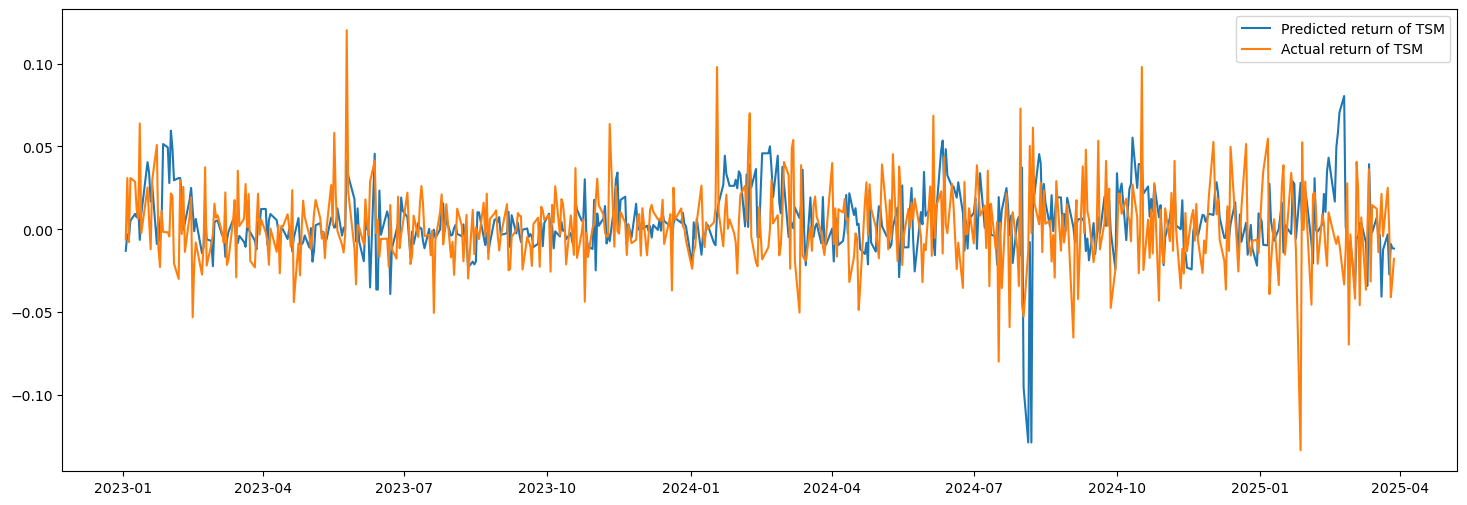

R-squared = -1.3197
Directional Accuracy: 0.5525846702317291


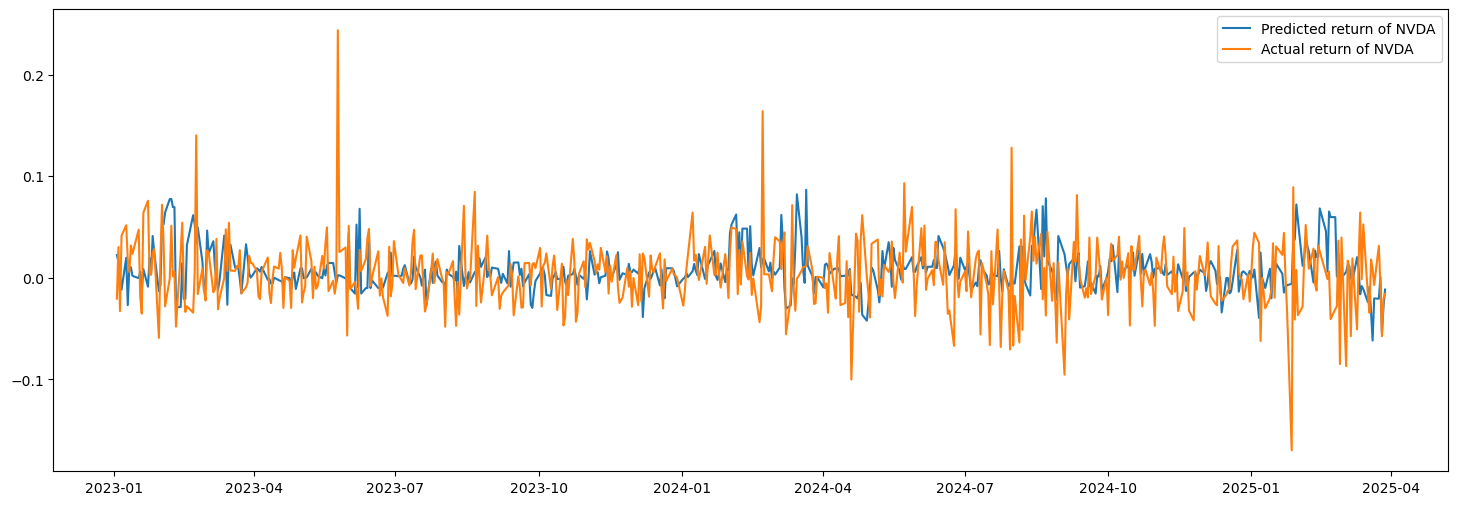

R-squared = -2.4227
Directional Accuracy: 0.5739750445632799


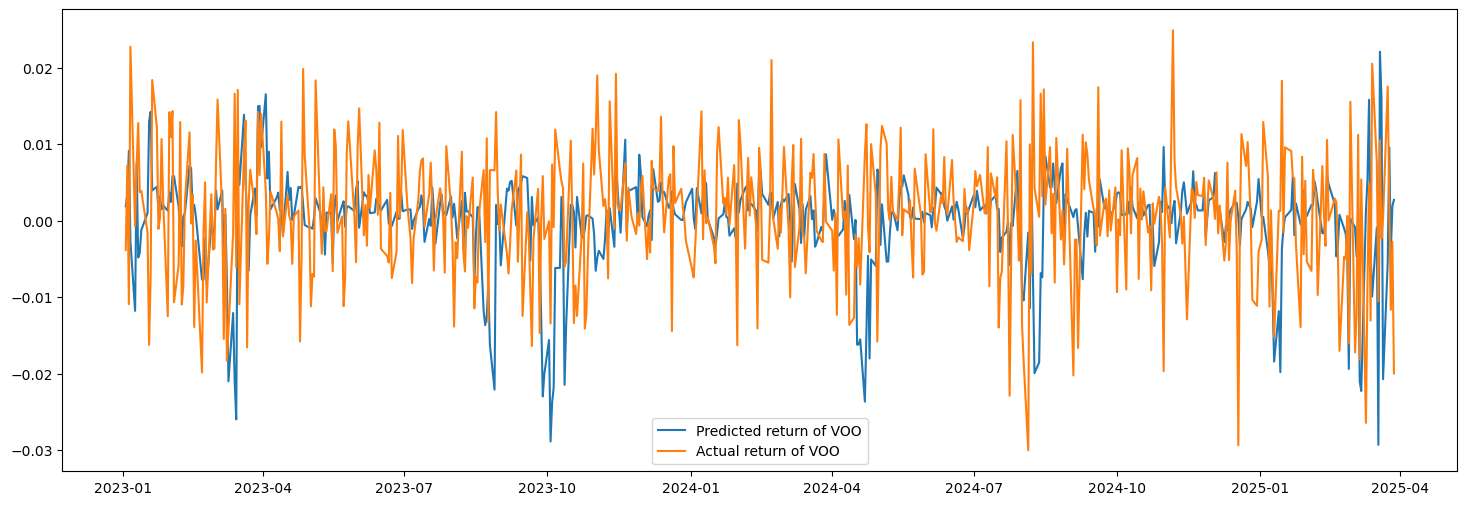

R-squared = -1.5308
Directional Accuracy: 0.5846702317290553


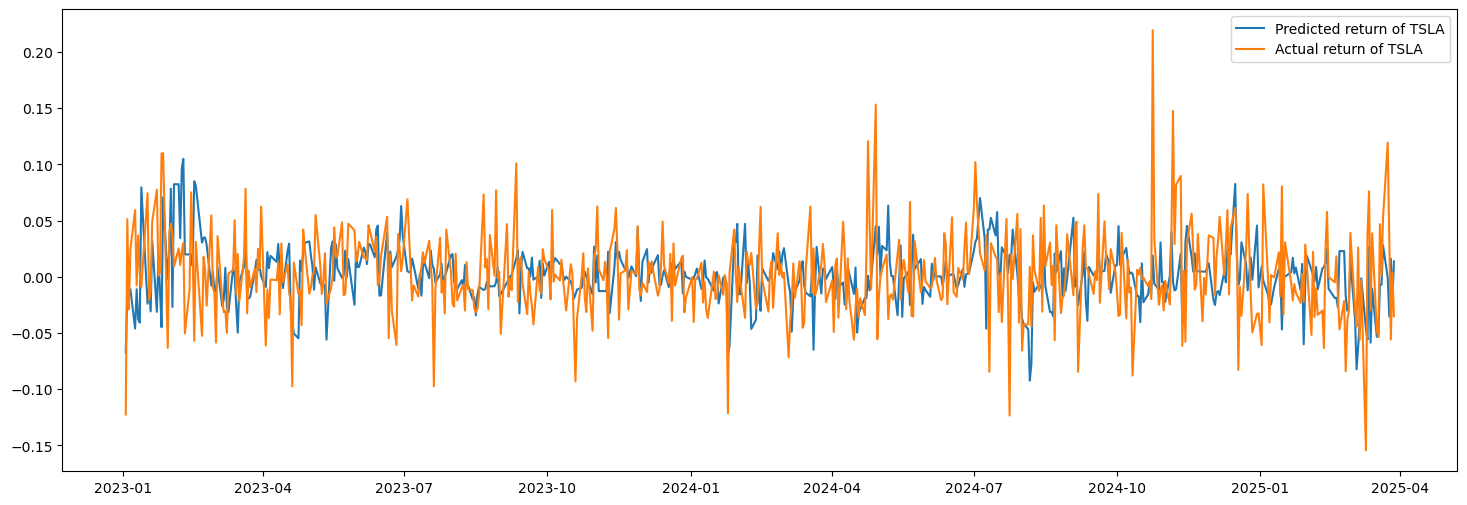

R-squared = -1.7716
Directional Accuracy: 0.5294117647058824


In [305]:
#Building Factor-Based Expected Returns
#XGBoost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

models = {}
predictions = {}

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][f"{ticker}"]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][f"{ticker}"]
    
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 100, random_state = 42).fit(X_train,y_train)
    models[ticker] = model
    predictions[ticker] = model.predict(X_test)
    

    plt.figure(figsize = (18, 6))
    plt.plot(y_test.index,predictions[ticker], label = f"Predicted return of {ticker}")
    plt.plot(y_test.index, y_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions[ticker], y_test):.4f}")
    
    directional_accuracy = np.mean(np.sign(predictions[ticker]) == np.sign(y_test))
    print("Directional Accuracy:", directional_accuracy)

#As we can see R2 < 0: worse than simply predicting the average

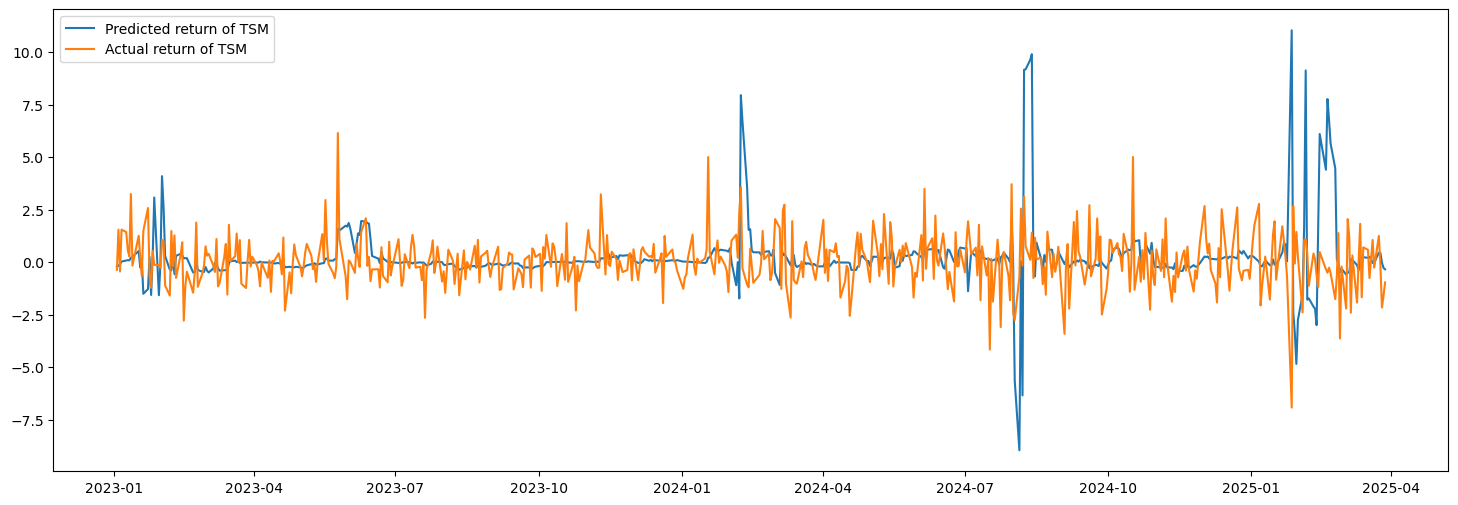

R-squared = -0.6218
Directional Accuracy: 0.5000810241451953


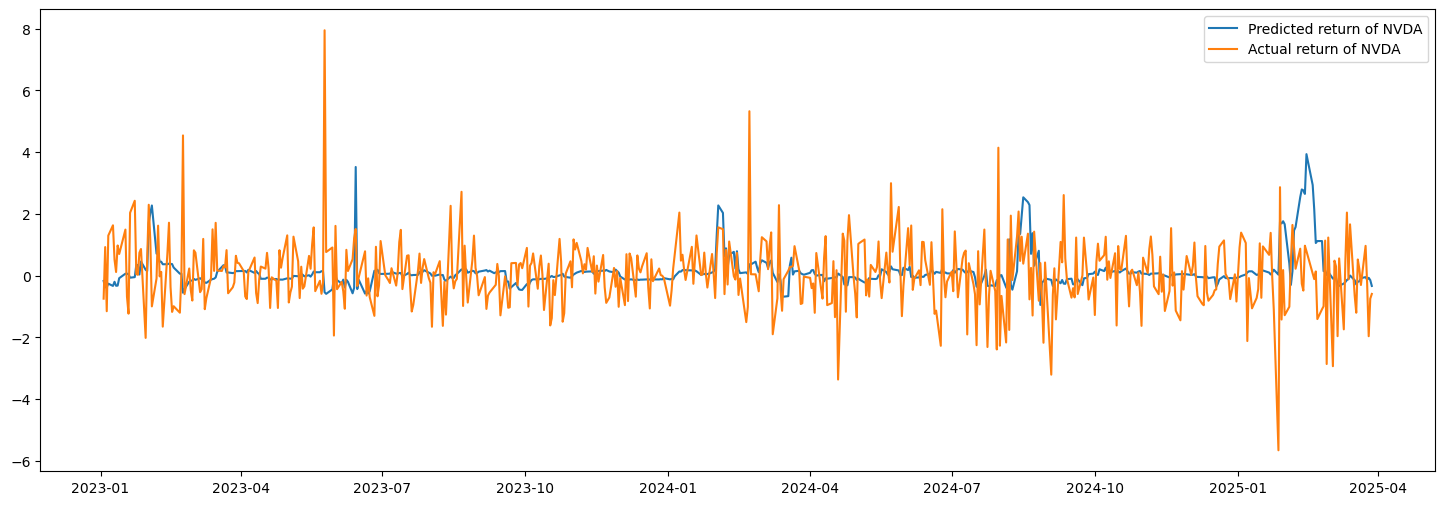

R-squared = -3.8238
Directional Accuracy: 0.5038907476781022


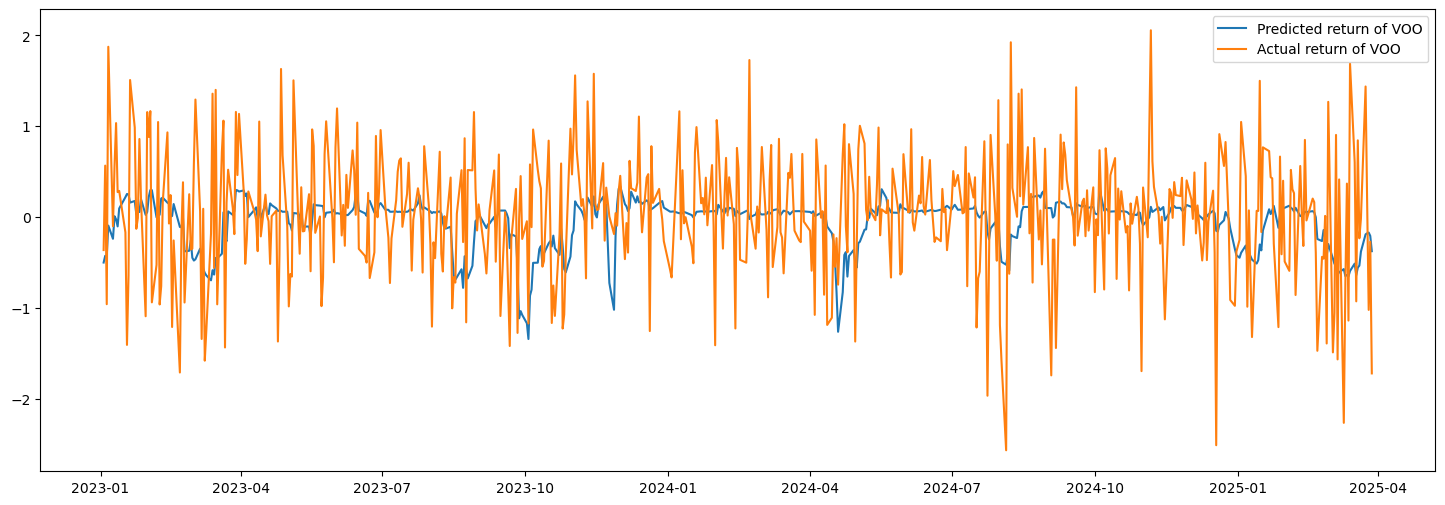

R-squared = -6.0389
Directional Accuracy: 0.5096990667924924


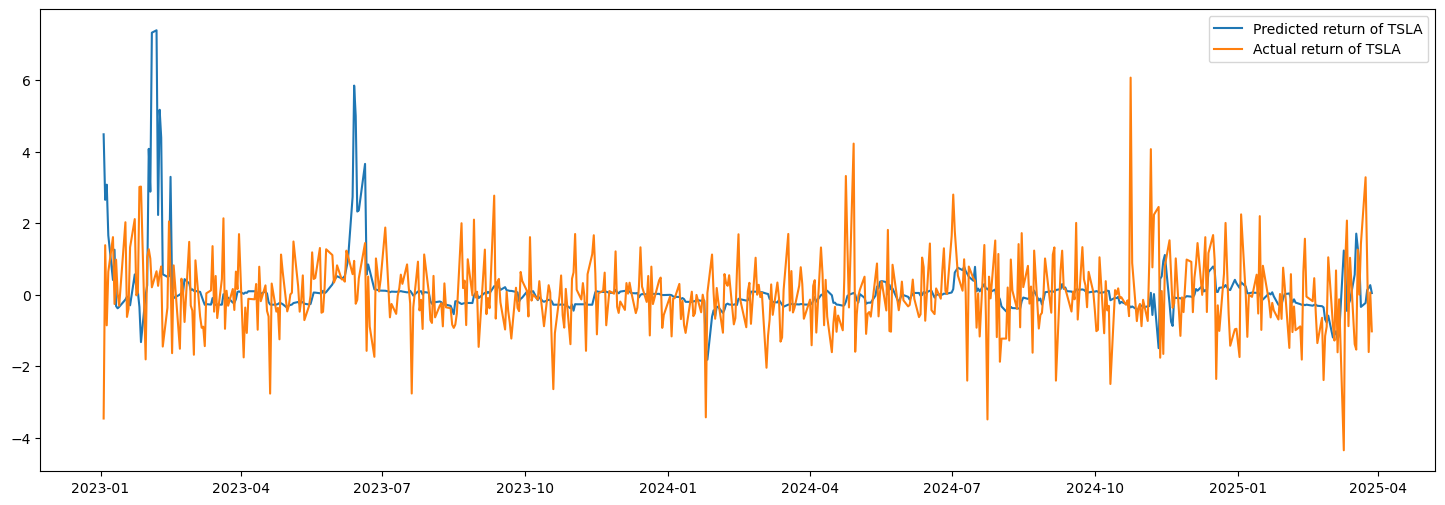

R-squared = -1.5024
Directional Accuracy: 0.5002684917752549


In [306]:
#Building Factor-Based Expected Returns
#SVM
#Here we need to scale the data before fitting, otherwise predictions for TSM and VOO will be constants
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

models = {}
predictions = {}

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][[f"{ticker}"]]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][[f"{ticker}"]]

    scalar_X = StandardScaler().fit(X_train)
    X_scaled_train = scalar_X.transform(X_train)
    X_scaled_test = scalar_X.transform(X_test)
    scalar_y = StandardScaler().fit(y_train)
    y_scaled_train = scalar_y.transform(y_train)
    y_scaled_test = scalar_y.transform(y_test)
    
    model = SVR(kernel = "rbf", C = 1000.0, gamma = "auto").fit(X_scaled_train, y_scaled_train.ravel())   #add .ravel() to turn y.shape from (..,1) to (..,)
    models[ticker] = model
    predictions[ticker] = model.predict(X_scaled_test)
    #predictions[ticker][predictions[ticker] > 5] = 5                 #upper bound for prediction
    #predictions[ticker][predictions[ticker] < -5] = -5               #lower bound for prediction

    plt.figure(figsize = (18, 6))
    plt.plot(X_test.index, predictions[ticker], label = f"Predicted return of {ticker}")
    plt.plot(X_test.index, y_scaled_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions[ticker], y_scaled_test):.4f}")
    
    directional_accuracy = np.mean(np.sign(predictions[ticker]) == np.sign(y_scaled_test))
    print("Directional Accuracy:", directional_accuracy)

#As we can see R2 < 0: worse than simply predicting the average

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 1.0232 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


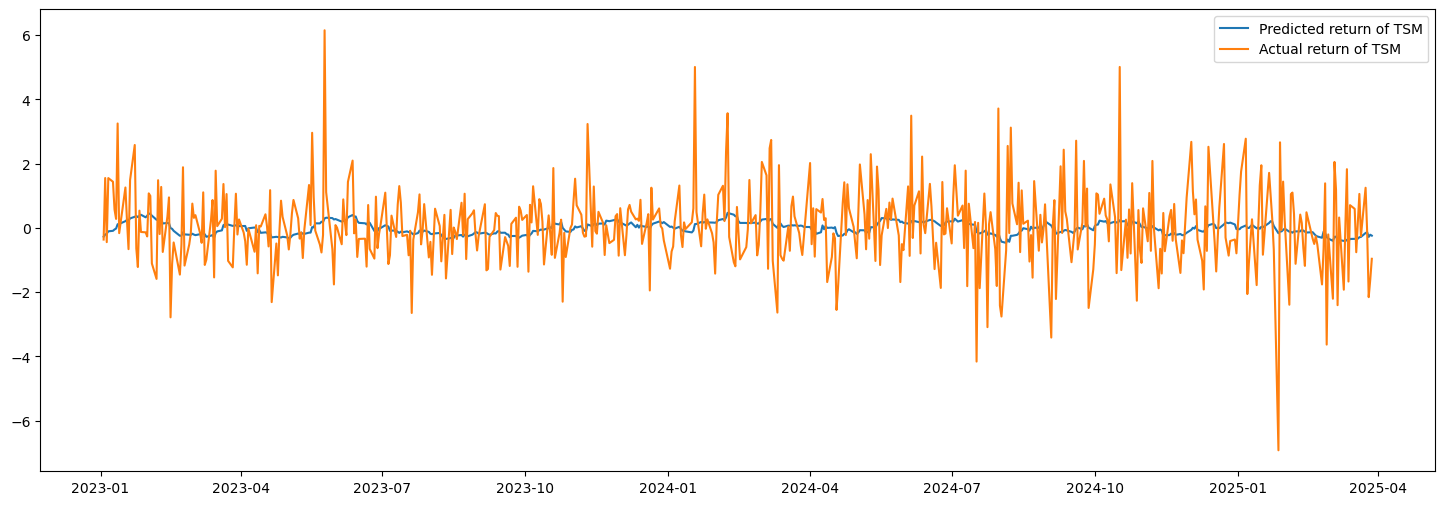

R-squared = -40.1579
Directional Accuracy: 0.5472370766488414
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9711 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


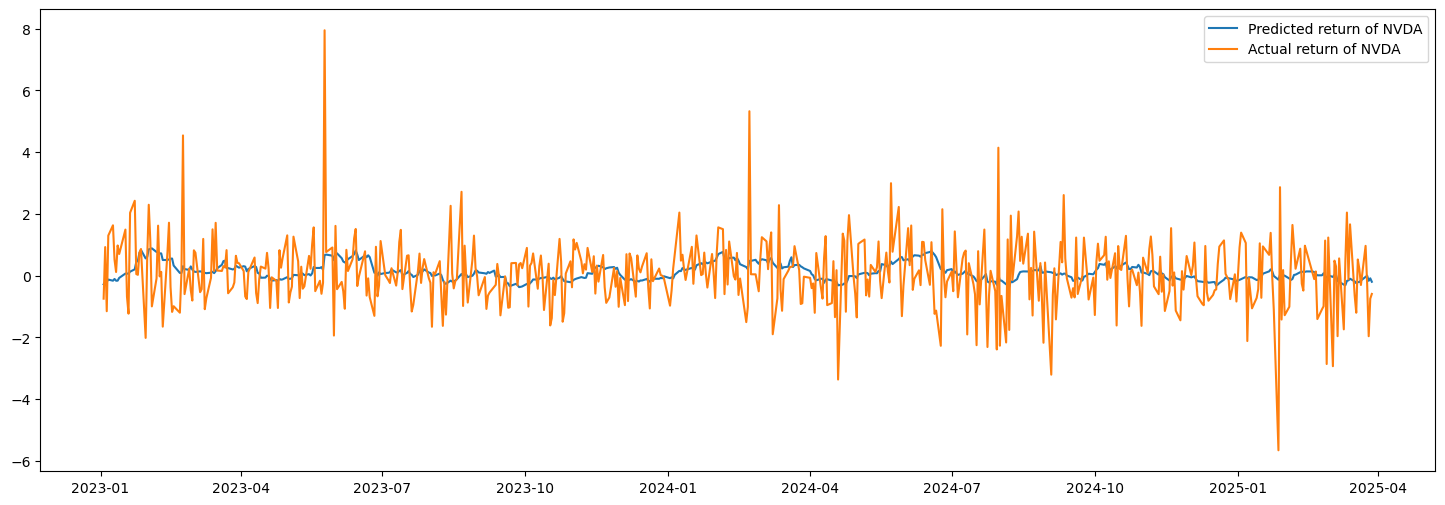

R-squared = -15.0084
Directional Accuracy: 0.5543672014260249
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0378 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


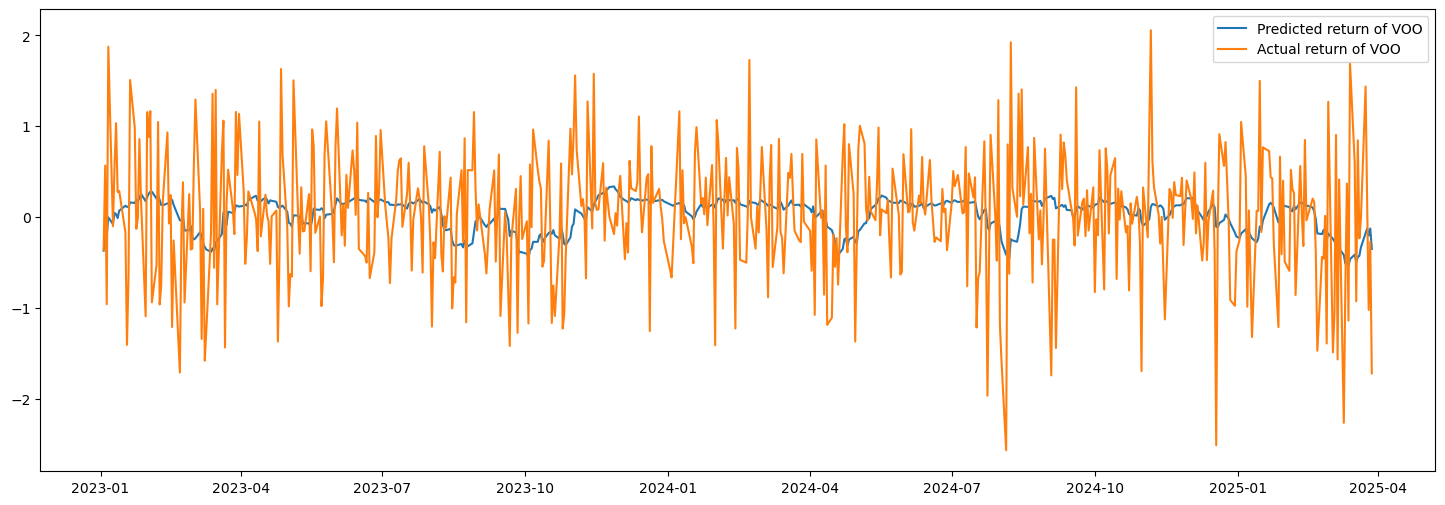

R-squared = -13.5333
Directional Accuracy: 0.5864527629233511
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9806  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


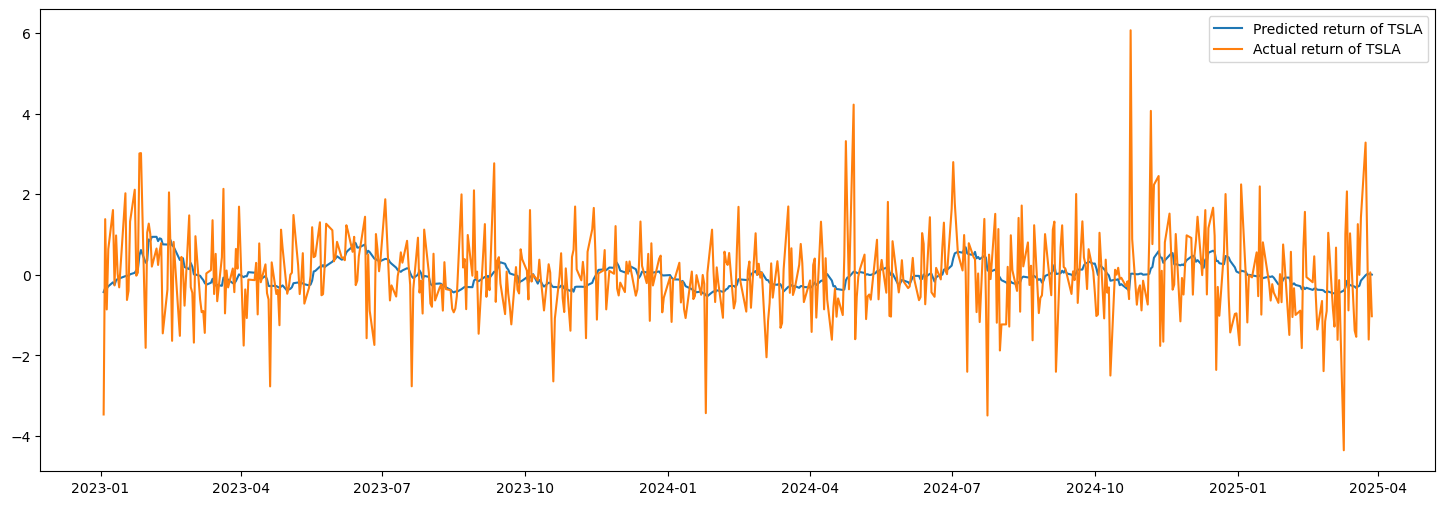

R-squared = -11.3753
Directional Accuracy: 0.5971479500891266


In [307]:
#Building Factor-Based Expected Returns
#Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

models = {}
predictions = {}

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][[f"{ticker}"]]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][[f"{ticker}"]]

    scalar_X = StandardScaler().fit(X_train)
    X_scaled_train = scalar_X.transform(X_train)
    X_scaled_test = scalar_X.transform(X_test)
    scalar_y = StandardScaler().fit(y_train)
    y_scaled_train = scalar_y.transform(y_train)
    y_scaled_test = scalar_y.transform(y_test)

    model = Sequential([
        Input(shape = (X_scaled_train.shape[1],)),
        Dense(64, activation = "relu"),
        Dense(32, activation = "relu"),
        Dense(1)
    ])
    model.compile(optimizer = "Adam", loss = "mse") 
    model.fit(X_scaled_train, y_scaled_train.ravel())   #add .ravel() to turn y.shape from (..,1) to (..,)
    models[ticker] = model
    predictions[ticker] = model.predict(X_scaled_test)
    predictions[ticker][predictions[ticker] > 5] = 5                 #upper bound for prediction
    predictions[ticker][predictions[ticker] < -5] = -5               #lower bound for prediction

    plt.figure(figsize = (18, 6))
    plt.plot(X_test.index, predictions[ticker], label = f"Predicted return of {ticker}")
    plt.plot(X_test.index, y_scaled_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions[ticker], y_scaled_test):.4f}")
    
    directional_accuracy = np.mean(np.sign(predictions[ticker]) == np.sign(y_scaled_test))
    print("Directional Accuracy:", directional_accuracy)

#As we can see R2 < 0: worse than simply predicting the average

In [308]:
#Building Factor-Based Expected Returns
#Cross-Validation evaluation on models
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tickers = ["TSM", "NVDA", "VOO", "TSLA"]

# Define models in a dictionary.
model_dict = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(), 
    "Lasso": Lasso(),
    "SVR": SVR(kernel='rbf'),
    "XGBRegressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42)
}

# Define parameter grids for models that have tunable hyperparameters.
param_grids = {
    "Ridge": {'model__alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'model__alpha': [0.01, 0.1, 1.0]},
    "SVR": {'model__C': [0.1, 1.0, 10.0],
            'model__gamma': ['scale', 'auto'],
            'model__epsilon': [0.1, 0.2, 0.5]},
    "XGBRegressor": {'model__n_estimators': [50, 100, 200],
                      'model__learning_rate': [0.01, 0.1, 0.2]},
    "RandomForestRegressor": {'model__n_estimators': [50, 100, 200]}
}

# Store the best CV R2 scores and best parameters in a results dictionary.
results = {}

tscv = TimeSeriesSplit(n_splits=5)


for ticker in tickers:
    combined_df_clean = combined_df.dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    
    X = combined_df_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y = combined_df_clean["SimpleRet"][f"{ticker}"]
    
    results[ticker] = {}
    
    # Loop over each model in our dictionary.
    for model_name, model in model_dict.items():
        print("\n")
        print(f"Evaluating model: {model_name}")
    
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        
        # Check if this model has a parameter grid defined.
        if model_name in param_grids:
            param_grid = param_grids[model_name]
            grid_search = GridSearchCV(pipeline,
                                       param_grid,
                                       cv=tscv,
                                       scoring='r2',
                                       verbose=1)
            grid_search.fit(X, y.values.ravel())
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            print(f"Best CV R2 for {model_name} on {ticker}: {best_score:.4f}")
            print(f"Best parameters: {best_params}")
            results[ticker][model_name] = {"Best CV R2": best_score, "Best Params": best_params}
        else:
            # If no grid is defined (e.g., for LinearRegression), simply do cross-validation.
            # Here we use GridSearchCV with an empty grid to maintain consistency.
            grid_search = GridSearchCV(pipeline,
                                       {},
                                       cv=tscv,
                                       scoring='r2',
                                       verbose=1)
            grid_search.fit(X, y.values.ravel())
            best_score = grid_search.best_score_
            print(f"CV R2 for {model_name} on {ticker}: {best_score:.4f}")
            results[ticker][model_name] = {"Best CV R2": best_score, "Best Params": None}
    
    print("\n")

# Convert the results into a DataFrame.
result_list = []
for ticker in results:
    for model_name in results[ticker]:
        result_list.append({
            "Ticker": ticker,
            "Model": model_name,
            "Best CV R2": results[ticker][model_name]["Best CV R2"],
            "Best Params": results[ticker][model_name]["Best Params"]
        })

results_df = pd.DataFrame(result_list)
results_df = results_df.pivot(index="Model", columns="Ticker", values="Best CV R2")
print("Grid Search CV R2 Scores:")
print(results_df)

# "Good" models are : Linear regression, Ridge



Evaluating model: LinearRegression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CV R2 for LinearRegression on TSM: 0.0512


Evaluating model: Ridge
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best CV R2 for Ridge on TSM: 0.0513
Best parameters: {'model__alpha': 10.0}


Evaluating model: Lasso
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best CV R2 for Lasso on TSM: -0.0013
Best parameters: {'model__alpha': 0.01}


Evaluating model: SVR
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best CV R2 for SVR on TSM: -0.0401
Best parameters: {'model__C': 0.1, 'model__epsilon': 0.1, 'model__gamma': 'scale'}


Evaluating model: XGBRegressor
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best CV R2 for XGBRegressor on TSM: -0.0031
Best parameters: {'model__learning_rate': 0.01, 'model__n_estimators': 50}


Evaluating model: RandomForestRegressor
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best CV R2 for Rando

Indices of high-leverage points: [ 940  942  943 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296
 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310
 1311 1312 1313 1375 1376 1377 1379 1380 1381 1382 1383 1384 1385 1386
 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1474
 1475 1499 1501 1502 1503 1504 1505 1506 1508 1510 1511 1512 1518 1534
 1535 1536 1537 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548
 1549 1550 1551 1552 1751 1752 1753 1754 1760 1761 1762 1786 1787 1788
 1789 1790 1791 1792 1793 1822 1867 1868 1869 1870 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1952 1953 1954 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979]


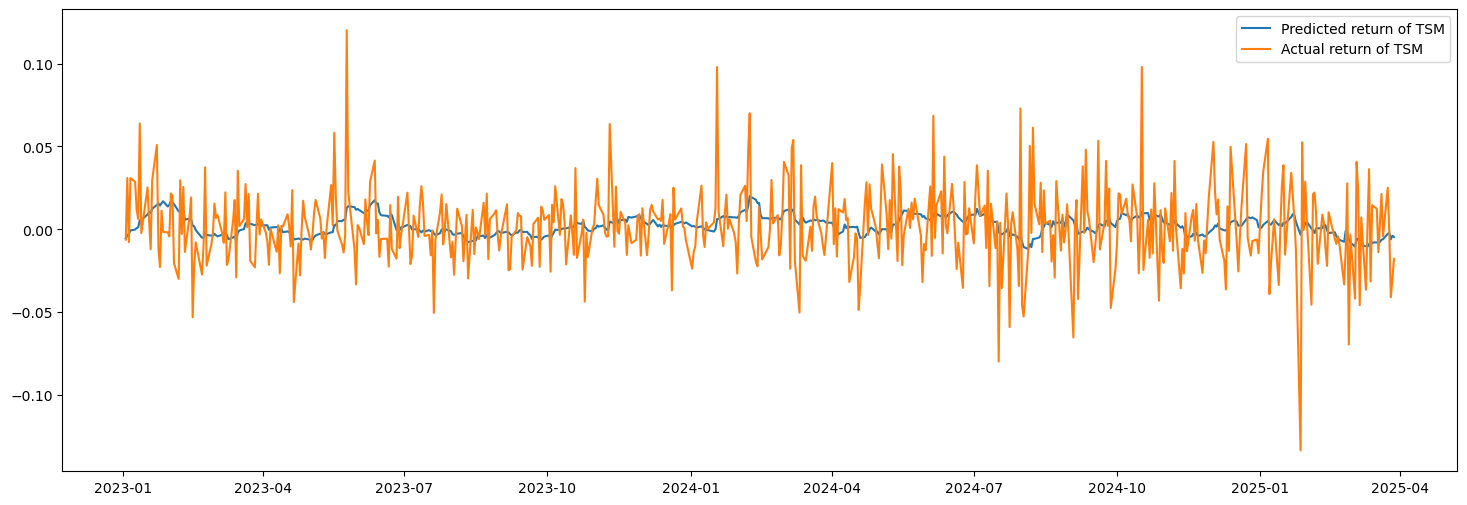

R-squared = -15.1179


Indices of high-leverage points: [ 336  337  450  451  452  453  454  455  456  457  458  459  460  461
  462  463  464  465  466  467  468  469  573  574  575  576  577  578
  579  580  581  582  583  584  585  586  587  588  589  590  591  940
  942  943  944  945  946  947  948  949  953  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976 1088 1089 1090 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295
 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309
 1310 1311 1312 1313 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712
 1713 1714 1715 1717 1719 1758 1759 1760 1819 1820 1821 1822 1823 1824
 1825 1826 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839
 1840 1841 1867 1910 1911 1912 1917 1918 1919 1920 1921 1924 1925 1959
 1960 1961 1962 1963 1964 1968 1972 1973 1974]


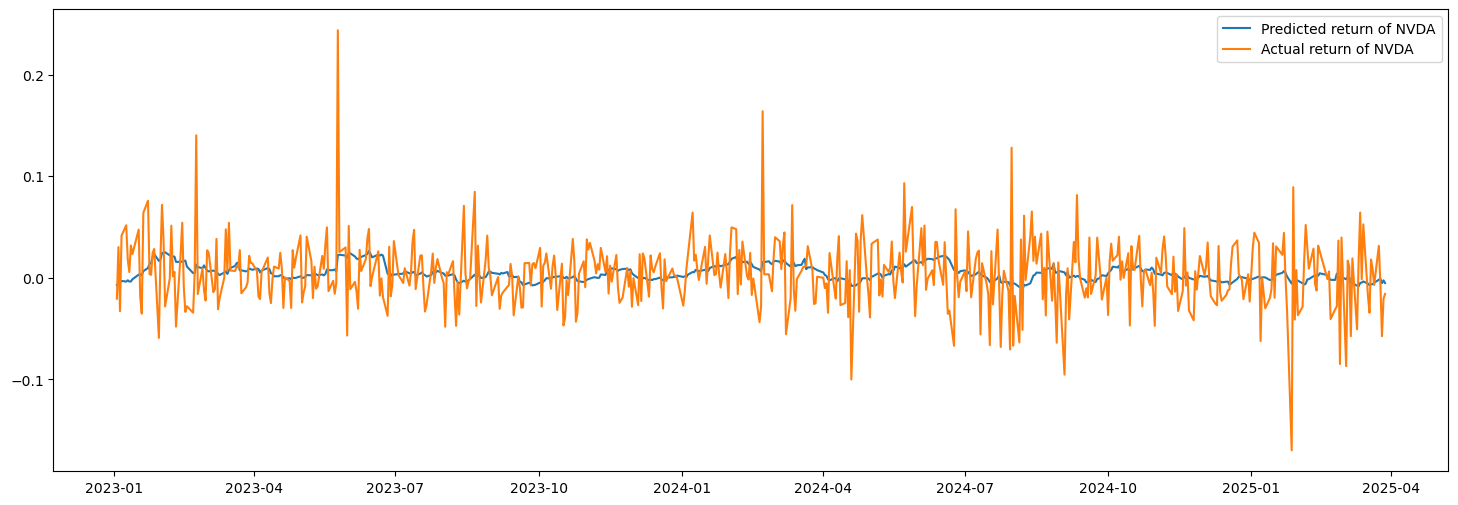

R-squared = -17.3114


Indices of high-leverage points: [ 142  241  279  943  981  987  998  999 1000 1001 1007 1277 1281 1282
 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296
 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310
 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324
 1344 1345 1346 1347 1348 1349 1350 1351 1466 1467 1468 1469 1758 1759
 1760 1822 1830 1831 1832 1833 1837 1838 1839 1894 1895 1896 1897 1920
 1925 1926 1927 1930 1935 1936 1950 1959 1960 1961 1962 1963 1964 1973
 1974]


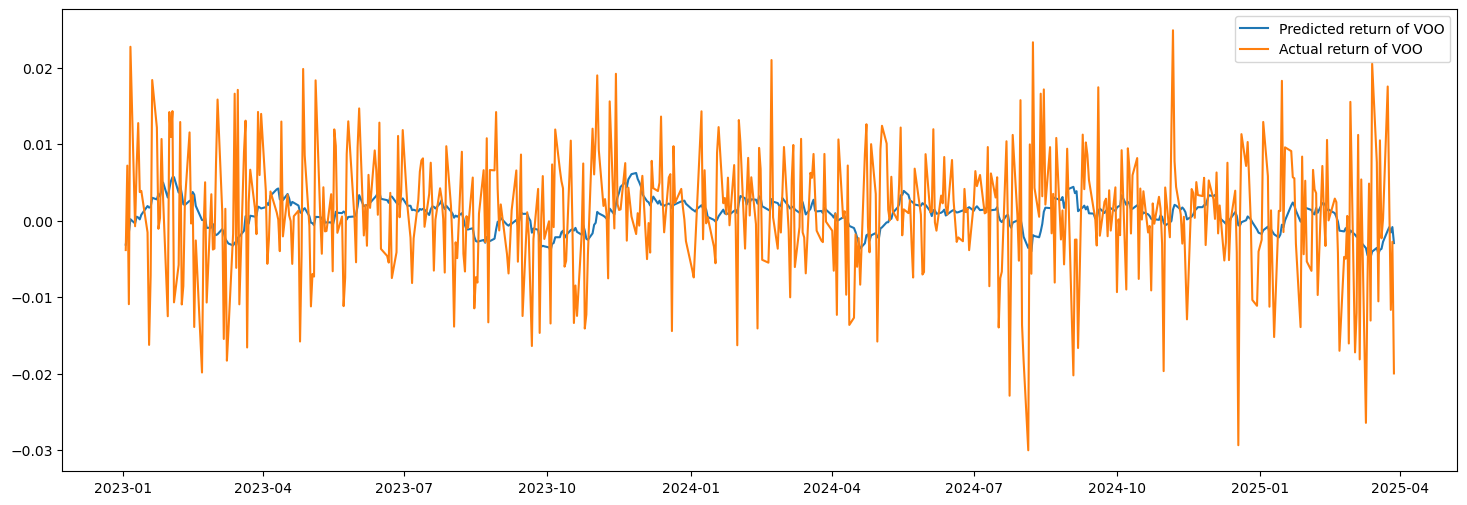

R-squared = -16.3292


Indices of high-leverage points: [ 939  940  941 1242 1245 1246 1257 1258 1259 1260 1261 1262 1263 1264
 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278
 1279 1280 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294
 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308
 1309 1310 1311 1312 1313 1314 1316 1317 1318 1319 1320 1321 1322 1323
 1324 1325 1326 1365 1366 1367 1369 1370 1371 1372 1373 1374 1375 1376
 1377 1378 1379 1380 1381 1382 1399 1402 1403 1404 1405 1406 1407 1408
 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422
 1423 1424 1425 1426 1427 1428 1429 1468 1469 1473 1474 1475 1476 1477
 1478 1479 1495 1535 1536 1540 1541 1542 1543 1699 1700 1701 1702 1703
 1704 1705 1835 1837 1838 1839 1840 1990 1991 1992 1993]


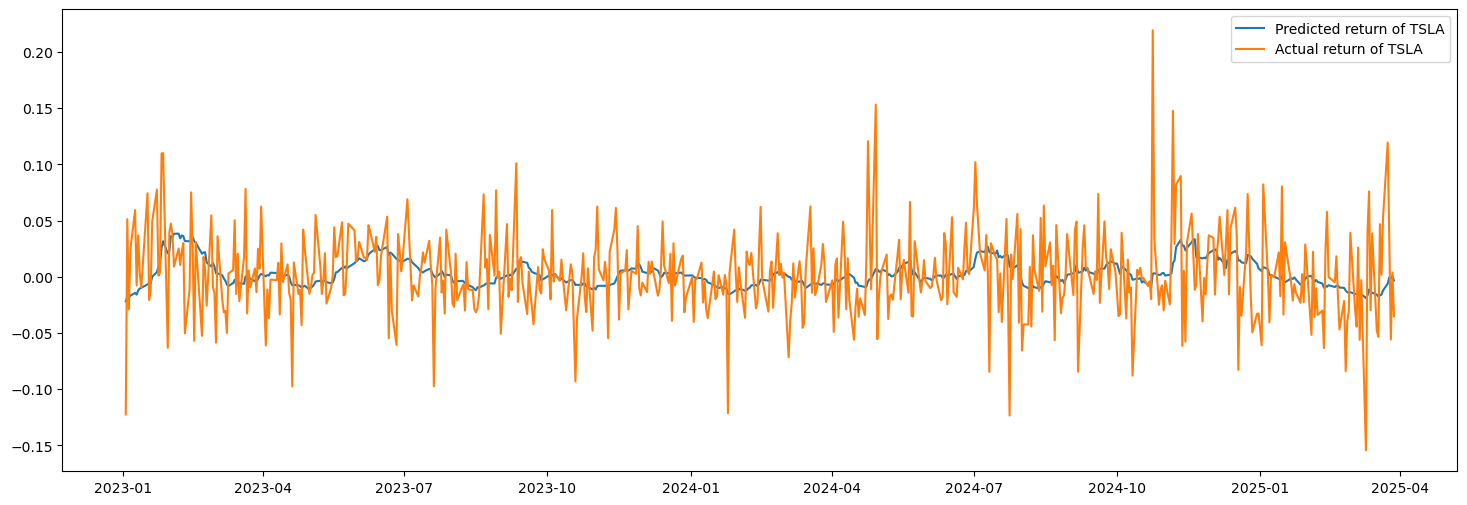

R-squared = -9.9345




In [309]:
# Data preprocessing
# Remove high-leverage points and reduce outliers' effet to see if this can improve the linear model 

import numpy as np 
import pandas as pd
from sklearn.linear_model import HuberRegressor

train_start = "2015-01-01"
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2025-03-31"

for ticker in tickers :
    combined_df_train_clean = combined_df.loc[train_start:train_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])
    combined_df_test_clean = combined_df.loc[test_start:test_end].dropna(subset=[("Factors", f"Momentum_{ticker}"), ("SimpleRet", f"{ticker}")])

    X_train = combined_df_train_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_train = combined_df_train_clean["SimpleRet"][[f"{ticker}"]]

    X_test = combined_df_test_clean["Factors"][[f"Momentum_{ticker}", f"Volatility_{ticker}"]]
    y_test = combined_df_test_clean["SimpleRet"][[f"{ticker}"]]
    
    n, p = X_train.shape
    intercept = pd.Series(1, index = X_train.index, name = "Intercept")
    X_train_intercept = pd.concat([X_train, intercept], axis = 1)

    # Compute the hat matrix :
    H = X_train_intercept.values @ np.linalg.inv((X_train_intercept.values.T @ X_train_intercept.values)) @ X_train_intercept.values.T
    leverage = np.diag(H)

    threshold = 2 * (p + 1) / n
    high_leverage_indices = np.where(leverage > threshold)[0]
    print("Indices of high-leverage points:", high_leverage_indices)

    mask = pd.Series(True, index = X.index)
    mask.iloc[high_leverage_indices] = False
    
    # Remove high-leverage points
    X_train_clean = X_train.loc[mask, :]
    y_train_clean = y_train.loc[mask]  

    # Use Huber to remove outliers
    # Huber is a L2 regularization
    huber = HuberRegressor(epsilon = 5, alpha = 1)
    huber.fit(X_train_clean, y_train_clean.values.ravel())  
    predictions = huber.predict(X_test)

    
    plt.figure(figsize = (18, 6))
    plt.plot(y_test.index, predictions, label = f"Predicted return of {ticker}")
    plt.plot(y_test.index, y_test, label = f"Actual return of {ticker}")
    plt.legend()
    plt.show()
    print(f"R-squared = {r2_score(predictions, y_test):.4f}")
    print("\n")
    
# In the end, R2 is still negative, so this doesn't help much